# **PROJEKTZIEL**

Bereinigen und Analysieren von Daten aus dem CRM-System zur Verbesserung der Effizienz der ICH-Online-Programmierschule.

Die Datenanalyse umfasst eine Reihe aufeinanderfolgender Schritte, von denen jeder eine wichtige Rolle im Forschungsprozess spielt.:<br>
<a href=#1>1.  Importieren erforderlicher Bibliotheken</a><br>
<a href=#2>2.  Duplikate bereinigen</a><br>
<a href=#3>3.  Datentypkonvertierung für Deals, Anrufe, Ausgaben, Kontakte</a><br>
<a href=#4>4.  INTEGRATION VON KONTAKTEN MIT DEALS</a><br>
<a href=#5>5.  Beschreibende Statistik</a><br>
<a href=#6>6.  ZEITREIHENANALYSE</a><br>
<a href=#7>7.  Anrufanalyse</a><br>
<a href=#8>8.  Analyse pro Monat</a><br>
<a href=#9>9.  Analyse der Handelsschlusszeiten</a><br>
<a href=#10>10. ANALYSE DER KAMPAGNENWIRKSAMKEIT</a><br>
<a href=#11>11. Visualisierung der Top 10 Conversion-Kampagnen</a><br>
<a href=#12>12. Effektivität von Marketingquellen</a><br>
<a href=#13>13. Leistungsanalyse der Verkaufsabteilung</a><br>
<a href=#14>14. Analyse der Deal Owner-Leistung</a><br>
<a href=#15>15. ZAHLUNGS- UND PRODUKTANALYSE</a><br>
<a href=#16>16. GEOGRAFISCHE ANALYSE</a><br>
<a href=#17>17. Analyse nach Stadt und Deutschniveau</a><br>
<a href=#18>18. Umrechnung(Konvertierung) nach Stadt und Deutschkenntnissen</a><br>
<a href=#19>19. Die effektivsten Manager (Kontaktinhaber)</a><br>
<a href=#20>20. Die profitabelsten Produkte</a><br>
<a href=#21>21. ALLGEMEINE EMPFEHLUNGEN</a><br>
<a href=#22>22. SCHLUSSFOLGERUNGEN</a><br>
<a href=#23>23.  PRODUKTANALYSE</a><br>
<a href=#24>24.  Berechnen grundlegende Kennzahlen</a><br>
<a href=#25>25.  Analyse der Schadensursachen</a><br>
<a href=#26>26.  Formulieren eine Hypothese (HYPOTHESE FÜR WACHSTUM)</a><br>
<a href=#27>27.  Metrischer Baum </a><br>
<a href=#28>28.  SCHLUSSFOLGERUNG </a><br>
<a href=#29>29. Es war toll, mit euch zu lernen, danke!</a><br>


# <a name='1'>**1.  Importieren erforderlicher Bibliotheken**</a><br>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

In [3]:
calls_df = pd.read_excel("Calls (Done).xlsx", dtype={'Id': str, 'Contact Name': str})
deals_df = pd.read_excel("Copy of Deals (Done).xlsx", dtype={'Id': str, 'Contact Name': str})
spend_df = pd.read_excel('Spend (Done).xlsx')
contacts_df = pd.read_excel("Contacts (Done).xlsx", dtype={'Id': str, 'Contact Name': str})

In [ ]:
calls_df

,Id,Call Start Time,Call Owner Name,CONTACTID,Call Type,Call Duration (in seconds),Call Status,Dialled Number,Outgoing Call Status,Scheduled in CRM,Tag
0,5805028000000805001,30.06.2023 08:43,John Doe,NaN,Inbound,171.0,Received,NaN,NaN,NaN,NaN
1,5805028000000768006,30.06.2023 08:46,John Doe,NaN,Outbound,28.0,Attended Dialled,NaN,Completed,0.0,NaN
2,5805028000000764027,30.06.2023 08:59,John Doe,NaN,Outbound,24.0,Attended Dialled,NaN,Completed,0.0,NaN
3,5805028000000787003,30.06.2023 09:20,John Doe,5.805028e+18,Outbound,6.0,Attended Dialled,NaN,Completed,0.0,NaN
4,5805028000000768019,30.06.2023 09:30,John Doe,5.805028e+18,Outbound,11.0,Attended Dialled,NaN,Completed,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
95869,5805028000056889515,21.06.2024 15:30,Ulysses Adams,5.805028e+18,Outbound,6.0,Attended Dialled,NaN,Completed,0.0,NaN
95870,5805028000056875317,21.06.2024 15:30,Victor Barnes,5.805028e+18,Outbound,8.0,Attended Dialled,NaN,Completed,0.0,NaN
95871,5805028000056832495,21.06.2024 15:30,Kevin Parker,5.805028e+18,Outbound,5.0,Attended Dialled,NaN,Completed,0.0,NaN
95872,5805028000056893619,21.06.2024 15:30,Victor Barnes,5.805028e+18,Outbound,0.0,Unattended Dialled,NaN,Completed,0.0,NaN


In [ ]:
calls_df.shape

(95874, 11)

In [ ]:
calls_df.head()

,Id,Call Start Time,Call Owner Name,CONTACTID,Call Type,Call Duration (in seconds),Call Status,Dialled Number,Outgoing Call Status,Scheduled in CRM,Tag
0,5805028000000805001,30.06.2023 08:43,John Doe,NaN,Inbound,171.0,Received,NaN,NaN,NaN,NaN
1,5805028000000768006,30.06.2023 08:46,John Doe,NaN,Outbound,28.0,Attended Dialled,NaN,Completed,0.0,NaN
2,5805028000000764027,30.06.2023 08:59,John Doe,NaN,Outbound,24.0,Attended Dialled,NaN,Completed,0.0,NaN
3,5805028000000787003,30.06.2023 09:20,John Doe,5.805028e+18,Outbound,6.0,Attended Dialled,NaN,Completed,0.0,NaN
4,5805028000000768019,30.06.2023 09:30,John Doe,5.805028e+18,Outbound,11.0,Attended Dialled,NaN,Completed,0.0,NaN


In [ ]:
calls_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95874 entries, 0 to 95873
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Id                          95874 non-null  object 
 1   Call Start Time             95874 non-null  object 
 2   Call Owner Name             95874 non-null  object 
 3   CONTACTID                   91941 non-null  float64
 4   Call Type                   95874 non-null  object 
 5   Call Duration (in seconds)  95791 non-null  float64
 6   Call Status                 95874 non-null  object 
 7   Dialled Number              0 non-null      float64
 8   Outgoing Call Status        86875 non-null  object 
 9   Scheduled in CRM            86875 non-null  float64
 10  Tag                         0 non-null      float64
dtypes: float64(5), object(6)
memory usage: 8.0+ MB


In [ ]:
calls_df.describe()

,CONTACTID,Call Duration (in seconds),Dialled Number,Scheduled in CRM,Tag
count,9.194100e+04,95791.000000,0.0,86875.000000,0.0
mean,5.805028e+18,164.977263,NaN,0.001635,NaN
std,1.605587e+07,401.410826,NaN,0.040397,NaN
min,5.805028e+18,0.000000,NaN,0.000000,NaN
25%,5.805028e+18,4.000000,NaN,0.000000,NaN
50%,5.805028e+18,8.000000,NaN,0.000000,NaN
75%,5.805028e+18,98.000000,NaN,0.000000,NaN
max,5.805028e+18,7625.000000,NaN,1.000000,NaN


In [4]:
calls_df.drop('Tag', axis=1)

,Id,Call Start Time,Call Owner Name,CONTACTID,Call Type,Call Duration (in seconds),Call Status,Dialled Number,Outgoing Call Status,Scheduled in CRM
0,5805028000000805001,30.06.2023 08:43,John Doe,NaN,Inbound,171.0,Received,NaN,NaN,NaN
1,5805028000000768006,30.06.2023 08:46,John Doe,NaN,Outbound,28.0,Attended Dialled,NaN,Completed,0.0
2,5805028000000764027,30.06.2023 08:59,John Doe,NaN,Outbound,24.0,Attended Dialled,NaN,Completed,0.0
3,5805028000000787003,30.06.2023 09:20,John Doe,5.805028e+18,Outbound,6.0,Attended Dialled,NaN,Completed,0.0
4,5805028000000768019,30.06.2023 09:30,John Doe,5.805028e+18,Outbound,11.0,Attended Dialled,NaN,Completed,0.0
...,...,...,...,...,...,...,...,...,...,...
95869,5805028000056889515,21.06.2024 15:30,Ulysses Adams,5.805028e+18,Outbound,6.0,Attended Dialled,NaN,Completed,0.0
95870,5805028000056875317,21.06.2024 15:30,Victor Barnes,5.805028e+18,Outbound,8.0,Attended Dialled,NaN,Completed,0.0
95871,5805028000056832495,21.06.2024 15:30,Kevin Parker,5.805028e+18,Outbound,5.0,Attended Dialled,NaN,Completed,0.0
95872,5805028000056893619,21.06.2024 15:30,Victor Barnes,5.805028e+18,Outbound,0.0,Unattended Dialled,NaN,Completed,0.0


In [ ]:
contacts_df

,Id,Contact Owner Name,Created Time,Modified Time
0,5805028000000645014,Rachel White,27.06.2023 11:28,22.12.2023 13:34
1,5805028000000872003,Charlie Davis,03.07.2023 11:31,21.05.2024 10:23
2,5805028000000889001,Bob Brown,02.07.2023 22:37,21.12.2023 13:17
3,5805028000000907006,Bob Brown,03.07.2023 05:44,29.12.2023 15:20
4,5805028000000939010,Nina Scott,04.07.2023 10:11,16.04.2024 16:14
...,...,...,...,...
18543,5805028000056889209,Ulysses Adams,21.06.2024 12:11,21.06.2024 14:11
18544,5805028000056889351,Eva Kent,21.06.2024 13:32,21.06.2024 15:32
18545,5805028000056892018,Eva Kent,21.06.2024 10:21,21.06.2024 12:21
18546,5805028000056892055,Yara Edwards,21.06.2024 10:22,21.06.2024 12:23


In [ ]:
contacts_df.shape

(18548, 4)

In [ ]:
contacts_df.head()

,Id,Contact Owner Name,Created Time,Modified Time
0,5805028000000645014,Rachel White,27.06.2023 11:28,22.12.2023 13:34
1,5805028000000872003,Charlie Davis,03.07.2023 11:31,21.05.2024 10:23
2,5805028000000889001,Bob Brown,02.07.2023 22:37,21.12.2023 13:17
3,5805028000000907006,Bob Brown,03.07.2023 05:44,29.12.2023 15:20
4,5805028000000939010,Nina Scott,04.07.2023 10:11,16.04.2024 16:14


In [ ]:
contacts_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18548 entries, 0 to 18547
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Id                  18548 non-null  object
 1   Contact Owner Name  18548 non-null  object
 2   Created Time        18548 non-null  object
 3   Modified Time       18548 non-null  object
dtypes: object(4)
memory usage: 579.8+ KB


In [ ]:
contacts_df.describe()

,Id,Contact Owner Name,Created Time,Modified Time
count,18548,18548,18548,18548
unique,18548,28,17921,16580
top,5805028000056907001,Charlie Davis,10.06.2024 09:00,13.06.2024 17:08
freq,1,2018,13,25


In [ ]:
deals_df

,Id,Deal Owner Name,Closing Date,Quality,Stage,Lost Reason,Page,Campaign,SLA,Content,...,Created Time,Course duration,Months of study,Initial Amount Paid,Offer Total Amount,AOV_I,Revenue_I,Contact Name,City,Level of Deutsch
0,5805028000056864695,Ben Hall,NaN,NaN,New Lead,NaN,/eng/test,03.07.23women,NaN,v16,...,21.06.2024 15:30,NaN,NaN,NaN,NaN,NaN,0.0,5805028000056849495,NaN,NaN
1,5805028000056859489,Ulysses Adams,NaN,NaN,New Lead,NaN,/at-eng,NaN,NaN,NaN,...,21.06.2024 15:23,6.0,NaN,0,2000,NaN,0.0,5805028000056834471,NaN,NaN
2,5805028000056832357,Ulysses Adams,21.06.2024,D - Non Target,Lost,Non target,/at-eng,engwien_AT,00:26:43,b1-at,...,21.06.2024 14:45,NaN,NaN,NaN,NaN,NaN,0.0,5805028000056854421,NaN,NaN
3,5805028000056824246,Eva Kent,21.06.2024,E - Non Qualified,Lost,Invalid number,/eng,04.07.23recentlymoved_DE,01:00:04,bloggersvideo14com,...,21.06.2024 13:32,NaN,NaN,NaN,NaN,NaN,0.0,5805028000056889351,NaN,NaN
4,5805028000056873292,Ben Hall,21.06.2024,D - Non Target,Lost,Non target,/eng,discovery_DE,00:53:12,website,...,21.06.2024 13:21,NaN,NaN,NaN,NaN,NaN,0.0,5805028000056876176,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21590,5805028000000945016,Jane Smith,29.08.2023,A - High,Lost,Changed Decision,eng/digital-marketing,02.07.23wide_DE,"56 days, 19:01:59",b3,...,03.07.2023 20:39,NaN,NaN,NaN,NaN,NaN,0.0,5805028000000968001,NaN,NaN
21591,5805028000000927004,Bob Brown,09.07.2023,D - Non Target,Lost,Does not speak English,eng/digital-marketing,03.07.23women,NaN,b3,...,03.07.2023 20:17,NaN,NaN,NaN,NaN,NaN,0.0,5805028000000961001,NaN,NaN
21592,5805028000000922001,Bob Brown,03.07.2023,E - Non Qualified,Lost,Refugee,/,NaN,"4 days, 22:47:14",NaN,...,03.07.2023 17:03,NaN,NaN,0,0,NaN,0.0,5805028000001009140,NaN,NaN
21593,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
deals_df.shape

(21595, 25)

In [ ]:
deals_df.head()

,Id,Deal Owner Name,Closing Date,Quality,Stage,Lost Reason,Page,Campaign,SLA,Content,...,Created Time,Course duration,Months of study,Initial Amount Paid,Offer Total Amount,AOV_I,Revenue_I,Contact Name,City,Level of Deutsch
0,5805028000056864695,Ben Hall,NaN,NaN,New Lead,NaN,/eng/test,03.07.23women,NaN,v16,...,21.06.2024 15:30,NaN,NaN,NaN,NaN,NaN,0.0,5805028000056849495,NaN,NaN
1,5805028000056859489,Ulysses Adams,NaN,NaN,New Lead,NaN,/at-eng,NaN,NaN,NaN,...,21.06.2024 15:23,6.0,NaN,0,2000,NaN,0.0,5805028000056834471,NaN,NaN
2,5805028000056832357,Ulysses Adams,21.06.2024,D - Non Target,Lost,Non target,/at-eng,engwien_AT,00:26:43,b1-at,...,21.06.2024 14:45,NaN,NaN,NaN,NaN,NaN,0.0,5805028000056854421,NaN,NaN
3,5805028000056824246,Eva Kent,21.06.2024,E - Non Qualified,Lost,Invalid number,/eng,04.07.23recentlymoved_DE,01:00:04,bloggersvideo14com,...,21.06.2024 13:32,NaN,NaN,NaN,NaN,NaN,0.0,5805028000056889351,NaN,NaN
4,5805028000056873292,Ben Hall,21.06.2024,D - Non Target,Lost,Non target,/eng,discovery_DE,00:53:12,website,...,21.06.2024 13:21,NaN,NaN,NaN,NaN,NaN,0.0,5805028000056876176,NaN,NaN


In [ ]:
deals_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21595 entries, 0 to 21594
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   21593 non-null  object 
 1   Deal Owner Name      21564 non-null  object 
 2   Closing Date         14645 non-null  object 
 3   Quality              19340 non-null  object 
 4   Stage                21593 non-null  object 
 5   Lost Reason          16124 non-null  object 
 6   Page                 21593 non-null  object 
 7   Campaign             16067 non-null  object 
 8   SLA                  15533 non-null  object 
 9   Content              14147 non-null  object 
 10  Term                 12454 non-null  object 
 11  Source               21593 non-null  object 
 12  Payment Type         496 non-null    object 
 13  Product              3592 non-null   object 
 14  Education Type       3300 non-null   object 
 15  Created Time         21593 non-null 

In [ ]:
deals_df.describe()

,Course duration,Months of study,AOV_I,Revenue_I
count,3587.000000,840.000000,818.000000,21593.000000
mean,10.198495,5.442857,876.239718,163.083638
std,1.834681,2.919920,793.628079,1004.819530
min,6.000000,0.000000,0.000000,0.000000
25%,11.000000,3.000000,368.500000,0.000000
50%,11.000000,5.000000,1000.000000,0.000000
75%,11.000000,8.000000,1000.000000,0.000000
max,11.000000,11.000000,11500.000000,11500.000000


In [ ]:
spend_df

,Date,Source,Campaign,Impressions,Spend,Clicks,AdGroup,Ad
0,2023-07-03,Google Ads,gen_analyst_DE,6,0.00,0,NaN,NaN
1,2023-07-03,Google Ads,performancemax_eng_DE,4,0.01,1,NaN,NaN
2,2023-07-03,Facebook Ads,NaN,0,0.00,0,NaN,NaN
3,2023-07-03,Google Ads,NaN,0,0.00,0,NaN,NaN
4,2023-07-03,CRM,NaN,0,0.00,0,NaN,NaN
...,...,...,...,...,...,...,...,...
20774,2024-06-21,Facebook Ads,17.03.24wide_AT,7,0.07,0,wide,bloggersvideo16com_at
20775,2024-06-21,Tiktok Ads,12.07.2023wide_DE,61,0.16,0,wide,bloggersvideo14com
20776,2024-06-21,Partnership,NaN,0,0.00,0,NaN,NaN
20777,2024-06-21,Tiktok Ads,NaN,0,0.00,0,NaN,NaN


In [ ]:
spend_df.shape

(20779, 8)

In [ ]:
spend_df.head()

,Date,Source,Campaign,Impressions,Spend,Clicks,AdGroup,Ad
0,2023-07-03,Google Ads,gen_analyst_DE,6,0.00,0,NaN,NaN
1,2023-07-03,Google Ads,performancemax_eng_DE,4,0.01,1,NaN,NaN
2,2023-07-03,Facebook Ads,NaN,0,0.00,0,NaN,NaN
3,2023-07-03,Google Ads,NaN,0,0.00,0,NaN,NaN
4,2023-07-03,CRM,NaN,0,0.00,0,NaN,NaN


In [ ]:
spend_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20779 entries, 0 to 20778
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         20779 non-null  datetime64[ns]
 1   Source       20779 non-null  object        
 2   Campaign     14785 non-null  object        
 3   Impressions  20779 non-null  int64         
 4   Spend        20779 non-null  float64       
 5   Clicks       20779 non-null  int64         
 6   AdGroup      13951 non-null  object        
 7   Ad           13951 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 1.3+ MB


In [ ]:
spend_df.describe()

,Date,Impressions,Spend,Clicks
count,20779,20779.000000,20779.000000,20779.000000
mean,2024-01-14 22:32:40.864334080,2458.203475,7.195892,23.990616
min,2023-07-03 00:00:00,0.000000,0.000000,0.000000
25%,2023-10-13 00:00:00,0.000000,0.000000,0.000000
50%,2024-01-27 00:00:00,63.000000,0.580000,1.000000
75%,2024-04-16 00:00:00,709.000000,5.750000,12.000000
max,2024-06-21 00:00:00,431445.000000,774.000000,2415.000000
std,NaN,11442.528075,26.760080,85.245714


# **<a name='2'>2.  Duplikate bereinigen</a><br>**


In [5]:
initial_deals = len(deals_df)
initial_calls = len(calls_df)
initial_spend = len(spend_df)
initial_contacts = len(contacts_df)

deals_df.drop_duplicates(inplace=True)
calls_df.drop_duplicates(inplace=True)
spend_df.drop_duplicates(inplace=True)
contacts_df.drop_duplicates(inplace=True)

print(f"Doppelte Einträge entfernt aus Deals: {initial_deals - len(deals_df)}")
print(f"Doppelte Einträge entfernt aus Calls: {initial_calls - len(calls_df)}")
print(f"Doppelte Einträge entfernt aus Spend: {initial_spend - len(spend_df)}")
print(f"Doppelte Einträge entfernt aus Contacts: {initial_contacts - len(contacts_df)}")

Doppelte Einträge entfernt aus Deals: 0
Doppelte Einträge entfernt aus Calls: 0
Doppelte Einträge entfernt aus Spend: 917
Doppelte Einträge entfernt aus Contacts: 0


# **<a name='3'>3.  Datentypkonvertierung für Deals, Anrufe, Ausgaben, Kontakte</a><br>**

In [6]:
# Datentypen für Deals konvertieren

# Datumsangaben konvertieren
deals_df['Created Time'] = pd.to_datetime(deals_df['Created Time'], dayfirst=True, errors='coerce')
deals_df['Closing Date'] = pd.to_datetime(deals_df['Closing Date'], dayfirst=True, errors='coerce')

# Bereinigung und Konvertierung von Währungswerten
def clean_amount(amount):
    if pd.isna(amount):
        return np.nan
    if isinstance(amount, str):
        # Währungssymbole und Leerzeichen entfernen
        cleaned = amount.replace('$', '').replace('€', '').replace(',', '').strip()
        try:
            return float(cleaned)
        except:
            return np.nan
    return float(amount) if not pd.isna(amount) else np.nan

deals_df['Initial Amount Paid'] = deals_df['Initial Amount Paid'].apply(clean_amount)
deals_df['Offer Total Amount'] = deals_df['Offer Total Amount'].apply(clean_amount)

# Numerische Felder konvertieren
deals_df['Course duration'] = pd.to_numeric(deals_df['Course duration'], errors='coerce')
deals_df['Months of study'] = pd.to_numeric(deals_df['Months of study'], errors='coerce')

# Datentypen für Calls konvertieren
calls_df['Call Start Time'] = pd.to_datetime(calls_df['Call Start Time'], dayfirst=True, errors='coerce')
calls_df['Call Duration (in seconds)'] = pd.to_numeric(calls_df['Call Duration (in seconds)'], errors='coerce')

# Datentypen für Spend konvertieren
spend_df['Date'] = pd.to_datetime(spend_df['Date'], errors='coerce')
spend_df['Spend'] = spend_df['Spend'].astype(str).str.replace('€', '').str.strip()
spend_df['Spend'] = pd.to_numeric(spend_df['Spend'], errors='coerce')
spend_df['Impressions'] = pd.to_numeric(spend_df['Impressions'], errors='coerce')
spend_df['Clicks'] = pd.to_numeric(spend_df['Clicks'], errors='coerce')

# Datentypen für Contacts konvertieren
contacts_df['Created Time'] = pd.to_datetime(contacts_df['Created Time'], dayfirst=True, errors='coerce')
contacts_df['Modified Time'] = pd.to_datetime(contacts_df['Modified Time'], dayfirst=True, errors='coerce')


# Fehlende kategorische Werte in Deals mit 'Unknown' auffüllen
categorical_columns = ['Quality', 'Stage', 'Lost Reason', 'Page', 'Campaign', 'Content', 'Term',
                      'Source', 'Payment Type', 'Product', 'Education Type', 'City', 'Level of Deutsch']
for col in categorical_columns:
    if col in deals_df.columns:
        deals_df[col] = deals_df[col].fillna('Unknown')

# Zusätzliche Felder für die Analyse erstellen
deals_df['Creation Date'] = deals_df['Created Time'].dt.date
deals_df['Creation Month'] = deals_df['Created Time'].dt.to_period('M')
deals_df['Deal Age (days)'] = (deals_df['Closing Date'] - deals_df['Created Time']).dt.days

# Vollständig leere Spalten entfernen
deals_df = deals_df.dropna(axis=1, how='all')
calls_df = calls_df.dropna(axis=1, how='all')
spend_df = spend_df.dropna(axis=1, how='all')
contacts_df = contacts_df.dropna(axis=1, how='all')

print(f"Deals: {deals_df.shape[0]} Zeilen, {deals_df.shape[1]} Spalten")
print(f"Calls: {calls_df.shape[0]} Zeilen, {calls_df.shape[1]} Spalten")
print(f"Spend: {spend_df.shape[0]} Zeilen, {spend_df.shape[1]} Spalten")
print(f"Contacts: {contacts_df.shape[0]} Zeilen, {contacts_df.shape[1]} Spalten")


Deals: 21595 Zeilen, 28 Spalten
Calls: 95874 Zeilen, 9 Spalten
Spend: 19862 Zeilen, 8 Spalten
Contacts: 18548 Zeilen, 4 Spalten


# **<a name='4'>4.  INTEGRATION VON KONTAKTEN MIT DEALS</a><br>**

In [7]:
# Sicherstellen, dass Spalten korrekte Datentypen für das Zusammenführen haben
deals_df['Contact Name'] = deals_df['Contact Name'].astype(str)
deals_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21595 entries, 0 to 21594
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Id                   21593 non-null  object        
 1   Deal Owner Name      21564 non-null  object        
 2   Closing Date         14645 non-null  datetime64[ns]
 3   Quality              21595 non-null  object        
 4   Stage                21595 non-null  object        
 5   Lost Reason          21595 non-null  object        
 6   Page                 21595 non-null  object        
 7   Campaign             21595 non-null  object        
 8   SLA                  15533 non-null  object        
 9   Content              21595 non-null  object        
 10  Term                 21595 non-null  object        
 11  Source               21595 non-null  object        
 12  Payment Type         21595 non-null  object        
 13  Product              21595 non-

In [8]:
contacts_df['Id'] = contacts_df['Id'].astype(str)
contacts_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18548 entries, 0 to 18547
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Id                  18548 non-null  object        
 1   Contact Owner Name  18548 non-null  object        
 2   Created Time        18548 non-null  datetime64[ns]
 3   Modified Time       18548 non-null  datetime64[ns]
dtypes: datetime64[ns](2), object(2)
memory usage: 579.8+ KB


In [10]:
# LEFT JOIN durchführen, um Kontaktinformationen zu Deals hinzuzufügen
deals_with_contacts = deals_df.merge(
    contacts_df[['Id', 'Contact Owner Name', 'Created Time', 'Modified Time']],
    left_on='Contact Name',
    right_on='Id',
    how='left',
    suffixes=('', '_Contact')
)

In [11]:
deals_with_contacts

,Id,Deal Owner Name,Closing Date,Quality,Stage,Lost Reason,Page,Campaign,SLA,Content,...,Contact Name,City,Level of Deutsch,Creation Date,Creation Month,Deal Age (days),Id_Contact,Contact Owner Name,Created Time_Contact,Modified Time
0,5805028000056864695,Ben Hall,NaT,Unknown,New Lead,Unknown,/eng/test,03.07.23women,NaN,v16,...,5805028000056849495,Unknown,Unknown,2024-06-21,2024-06,NaN,5805028000056849495,Ben Hall,2024-06-21 15:30:00,2024-06-21 15:30:00
1,5805028000056859489,Ulysses Adams,NaT,Unknown,New Lead,Unknown,/at-eng,Unknown,NaN,Unknown,...,5805028000056834471,Unknown,Unknown,2024-06-21,2024-06,NaN,5805028000056834471,Ulysses Adams,2024-06-21 15:23:00,2024-06-21 15:24:00
2,5805028000056832357,Ulysses Adams,2024-06-21,D - Non Target,Lost,Non target,/at-eng,engwien_AT,00:26:43,b1-at,...,5805028000056854421,Unknown,Unknown,2024-06-21,2024-06,-1.0,5805028000056854421,Ulysses Adams,2024-06-21 14:45:00,2024-06-21 14:45:00
3,5805028000056824246,Eva Kent,2024-06-21,E - Non Qualified,Lost,Invalid number,/eng,04.07.23recentlymoved_DE,01:00:04,bloggersvideo14com,...,5805028000056889351,Unknown,Unknown,2024-06-21,2024-06,-1.0,5805028000056889351,Eva Kent,2024-06-21 13:32:00,2024-06-21 15:32:00
4,5805028000056873292,Ben Hall,2024-06-21,D - Non Target,Lost,Non target,/eng,discovery_DE,00:53:12,website,...,5805028000056876176,Unknown,Unknown,2024-06-21,2024-06,-1.0,5805028000056876176,Ben Hall,2024-06-21 13:21:00,2024-06-21 15:21:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21590,5805028000000945016,Jane Smith,2023-08-29,A - High,Lost,Changed Decision,eng/digital-marketing,02.07.23wide_DE,"56 days, 19:01:59",b3,...,5805028000000968001,Unknown,Unknown,2023-07-03,2023-07,56.0,5805028000000968001,Jane Smith,2023-07-03 20:39:00,2024-06-18 10:10:00
21591,5805028000000927004,Bob Brown,2023-07-09,D - Non Target,Lost,Does not speak English,eng/digital-marketing,03.07.23women,NaN,b3,...,5805028000000961001,Unknown,Unknown,2023-07-03,2023-07,5.0,5805028000000961001,Bob Brown,2023-07-03 20:17:00,2023-10-05 10:44:00
21592,5805028000000922001,Bob Brown,2023-07-03,E - Non Qualified,Lost,Refugee,/,Unknown,"4 days, 22:47:14",Unknown,...,5805028000001009140,Unknown,Unknown,2023-07-03,2023-07,-1.0,5805028000001009140,Alice Johnson,2023-07-05 11:20:00,2023-07-25 14:15:00
21593,NaN,NaN,NaT,Unknown,Unknown,Unknown,Unknown,Unknown,NaN,Unknown,...,nan,Unknown,Unknown,NaT,NaT,NaN,NaN,NaN,NaT,NaT


In [12]:
# Spalten umbenennen für bessere Lesbarkeit
deals_with_contacts.rename(columns={
    'Contact Owner Name': 'Contact Owner (from Contacts)',
    'Created Time_Contact': 'Contact Created Time',
    'Modified Time_Contact': 'Contact Modified Time'
}, inplace=True)

print(f"Anzahl der Deals nach Verknüpfung mit Contacts: {len(deals_with_contacts)}")
print(f"Deals ohne zugehörigen Kontakt: {deals_with_contacts['Contact Owner (from Contacts)'].isna().sum()}")

Anzahl der Deals nach Verknüpfung mit Contacts: 21595
Deals ohne zugehörigen Kontakt: 64


In [13]:
# Neue Spalte erstellen: Stimmt der Deal-Besitzer mit dem Kontakt-Besitzer überein?
deals_with_contacts['Owner Match'] = deals_with_contacts['Deal Owner Name'] == deals_with_contacts['Contact Owner (from Contacts)']
print(f"Deals, bei denen Deal-Besitzer und Kontakt-Besitzer übereinstimmen: {deals_with_contacts['Owner Match'].sum()}")
print(f"Deals, bei denen die Besitzer nicht übereinstimmen: {len(deals_with_contacts) - deals_with_contacts['Owner Match'].sum()}")

Deals, bei denen Deal-Besitzer und Kontakt-Besitzer übereinstimmen: 16926
Deals, bei denen die Besitzer nicht übereinstimmen: 4669


In [14]:
deals_with_contacts

,Id,Deal Owner Name,Closing Date,Quality,Stage,Lost Reason,Page,Campaign,SLA,Content,...,City,Level of Deutsch,Creation Date,Creation Month,Deal Age (days),Id_Contact,Contact Owner (from Contacts),Contact Created Time,Modified Time,Owner Match
0,5805028000056864695,Ben Hall,NaT,Unknown,New Lead,Unknown,/eng/test,03.07.23women,NaN,v16,...,Unknown,Unknown,2024-06-21,2024-06,NaN,5805028000056849495,Ben Hall,2024-06-21 15:30:00,2024-06-21 15:30:00,True
1,5805028000056859489,Ulysses Adams,NaT,Unknown,New Lead,Unknown,/at-eng,Unknown,NaN,Unknown,...,Unknown,Unknown,2024-06-21,2024-06,NaN,5805028000056834471,Ulysses Adams,2024-06-21 15:23:00,2024-06-21 15:24:00,True
2,5805028000056832357,Ulysses Adams,2024-06-21,D - Non Target,Lost,Non target,/at-eng,engwien_AT,00:26:43,b1-at,...,Unknown,Unknown,2024-06-21,2024-06,-1.0,5805028000056854421,Ulysses Adams,2024-06-21 14:45:00,2024-06-21 14:45:00,True
3,5805028000056824246,Eva Kent,2024-06-21,E - Non Qualified,Lost,Invalid number,/eng,04.07.23recentlymoved_DE,01:00:04,bloggersvideo14com,...,Unknown,Unknown,2024-06-21,2024-06,-1.0,5805028000056889351,Eva Kent,2024-06-21 13:32:00,2024-06-21 15:32:00,True
4,5805028000056873292,Ben Hall,2024-06-21,D - Non Target,Lost,Non target,/eng,discovery_DE,00:53:12,website,...,Unknown,Unknown,2024-06-21,2024-06,-1.0,5805028000056876176,Ben Hall,2024-06-21 13:21:00,2024-06-21 15:21:00,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21590,5805028000000945016,Jane Smith,2023-08-29,A - High,Lost,Changed Decision,eng/digital-marketing,02.07.23wide_DE,"56 days, 19:01:59",b3,...,Unknown,Unknown,2023-07-03,2023-07,56.0,5805028000000968001,Jane Smith,2023-07-03 20:39:00,2024-06-18 10:10:00,True
21591,5805028000000927004,Bob Brown,2023-07-09,D - Non Target,Lost,Does not speak English,eng/digital-marketing,03.07.23women,NaN,b3,...,Unknown,Unknown,2023-07-03,2023-07,5.0,5805028000000961001,Bob Brown,2023-07-03 20:17:00,2023-10-05 10:44:00,True
21592,5805028000000922001,Bob Brown,2023-07-03,E - Non Qualified,Lost,Refugee,/,Unknown,"4 days, 22:47:14",Unknown,...,Unknown,Unknown,2023-07-03,2023-07,-1.0,5805028000001009140,Alice Johnson,2023-07-05 11:20:00,2023-07-25 14:15:00,False
21593,NaN,NaN,NaT,Unknown,Unknown,Unknown,Unknown,Unknown,NaN,Unknown,...,Unknown,Unknown,NaT,NaT,NaN,NaN,NaN,NaT,NaT,False


# **<a name='5'>5.  Beschreibende Statistik</a><br>**

In [15]:
# Numerische Felder
numeric_columns = ['Initial Amount Paid', 'Offer Total Amount', 'Course duration', 'Months of study', 'Deal Age (days)']
available_numeric = [col for col in numeric_columns if col in deals_with_contacts.columns]

numeric_stats = deals_with_contacts[available_numeric].describe()
numeric_stats


,Initial Amount Paid,Offer Total Amount,Course duration,Months of study,Deal Age (days)
count,4165.000000,4.185000e+03,3587.000000,840.000000,14645.000000
mean,936.654982,7.384509e+03,10.198495,5.442857,13.882622
std,1414.495158,1.811660e+04,1.834681,2.919920,31.797587
min,0.000000,0.000000e+00,6.000000,0.000000,-358.000000
25%,300.000000,3.000000e+03,11.000000,3.000000,0.000000
50%,1000.000000,1.100000e+04,11.000000,5.000000,2.000000
75%,1000.000000,1.100000e+04,11.000000,8.000000,11.000000
max,11500.000000,1.139800e+06,11.000000,11.000000,334.000000


In [16]:
print("\nZusätzliche Kennzahlen:")
for col in available_numeric:
  if deals_with_contacts[col].notna().any():
    print(f"\n{col}:")
    print(f"  Mittelwert: {deals_with_contacts[col].mean():.2f}")
    print(f"  Median: {deals_with_contacts[col].median():.2f}")
    mode_values = deals_with_contacts[col].mode()
    mode_str = mode_values.iloc[0] if not mode_values.empty else "Kein Modus"
    print(f"  Modus: {mode_str}")
    data_range = deals_with_contacts[col].max() - deals_with_contacts[col].min()
    print(f"  Spannweite: {data_range:.2f}")


Zusätzliche Kennzahlen:

Initial Amount Paid:
  Mittelwert: 936.65
  Median: 1000.00
  Modus: 1000.0
  Spannweite: 11500.00

Offer Total Amount:
  Mittelwert: 7384.51
  Median: 11000.00
  Modus: 11000.0
  Spannweite: 1139800.00

Course duration:
  Mittelwert: 10.20
  Median: 11.00
  Modus: 11.0
  Spannweite: 5.00

Months of study:
  Mittelwert: 5.44
  Median: 5.00
  Modus: 6.0
  Spannweite: 11.00

Deal Age (days):
  Mittelwert: 13.88
  Median: 2.00
  Modus: -1.0
  Spannweite: 692.00


**Hinweis**: Der Modus des Feldes „Deal Age (days)“ (Dauer der Transaktion) beträgt –1 Tag. Dies weist auf systematische Fehler in den Daten hin (Abschluss einer Transaktion vor deren Erstellung). Es handelt sich hierbei nicht um einen geschäftlichen Insight, sondern um einen Hinweis auf einen Datenfehler. Dies ist der häufigste ungültige Wert und erfordert eine Bereinigung sowie eine Korrektur der Berechnungslogik. Wird dieser Fehler ignoriert, führt dies zu einer Verzerrung sämtlicher Statistiken und Schlussfolgerungen.

In [17]:
# Kategorische Felder
categorical_fields = ['Quality', 'Stage', 'Source', 'Product', 'Education Type', 'Payment Type', 'Campaign', 'Owner Match']

for field in categorical_fields:
    if field in deals_with_contacts.columns:
        print(f"\n{field} (Top 10):")
        value_counts = deals_with_contacts[field].value_counts().head(10)
        print(value_counts)


Quality (Top 10):
Quality
E - Non Qualified    7634
D - Non Target       6248
C - Low              3459
Unknown              2255
B - Medium           1564
A - High              432
F                       3
Name: count, dtype: int64

Stage (Top 10):
Stage
Lost                         15743
Call Delayed                  2248
Registered on Webinar         2072
Payment Done                   858
Waiting For Payment            325
Qualificated                   128
Registered on Offline Day      100
Need to Call - Sales            33
Need To Call                    31
Test Sent                       25
Name: count, dtype: int64

Source (Top 10):
Source
Facebook Ads      4850
Google Ads        4226
Organic           2590
Tiktok Ads        2051
SMM               1730
Youtube Ads       1657
CRM               1656
Bloggers          1089
Telegram posts    1001
Webinar            379
Name: count, dtype: int64

Product (Top 10):
Product
Unknown                18003
Digital Marketing       1990


In [18]:
# Prozentuale Verteilung
percentages = (deals_with_contacts[field].value_counts(normalize=True) * 100).head(10)
print(f"\nProzentuale Verteilung von {field}:")
for idx, val in percentages.items():
  print(f"  {idx}: {val:.1f}%")


Prozentuale Verteilung von Owner Match:
  True: 78.4%
  False: 21.6%


# **<a name='6'>6.  ZEITREIHENANALYSE</a><br>**

In [19]:
# Zeitreihen erstellen
deals_over_time = deals_with_contacts.groupby('Creation Date').size()
deals_over_time.head(10)

,0
Creation Date,
2023-07-03,3
2023-07-04,8
2023-07-05,7
2023-07-06,7
2023-07-07,10
2023-07-08,15
2023-07-09,11
2023-07-10,18
2023-07-11,9


# **<a name='7'>7.  Anrufanalyse</a><br>**

In [20]:
calls_df.loc[:, 'Call Date'] = calls_df['Call Start Time'].dt.date
calls_over_time = calls_df.groupby('Call Date').size()

calls_over_time.head(10)

#calls_df = calls_df[['Call Start Time']].copy()

#calls_df['Call Date'] = calls_df['Call Start Time'].dt.date
#calls_over_time = calls_df.groupby('Call Date').size()

#calls_over_time.head(10)

,0
Call Date,
2023-06-30,7
2023-07-03,2
2023-07-04,5
2023-07-05,4
2023-07-06,29
2023-07-07,27
2023-07-08,32
2023-07-09,48
2023-07-10,59


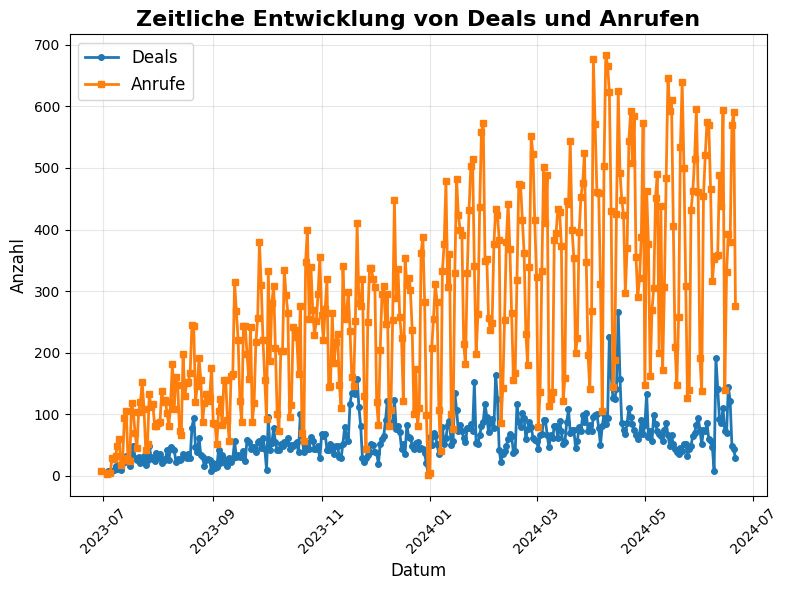

In [21]:
plt.figure(figsize=(8, 6))
plt.plot(deals_over_time.index, deals_over_time.values, marker='o', label='Deals', linewidth=2, markersize=4)
plt.plot(calls_over_time.index, calls_over_time.values, marker='s', label='Anrufe', linewidth=2, markersize=4)
plt.title('Zeitliche Entwicklung von Deals und Anrufen', fontsize=16, fontweight='bold')
plt.xlabel('Datum', fontsize=12)
plt.ylabel('Anzahl', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# **<a name='8'>8.  Analyse pro Monat</a><br>**

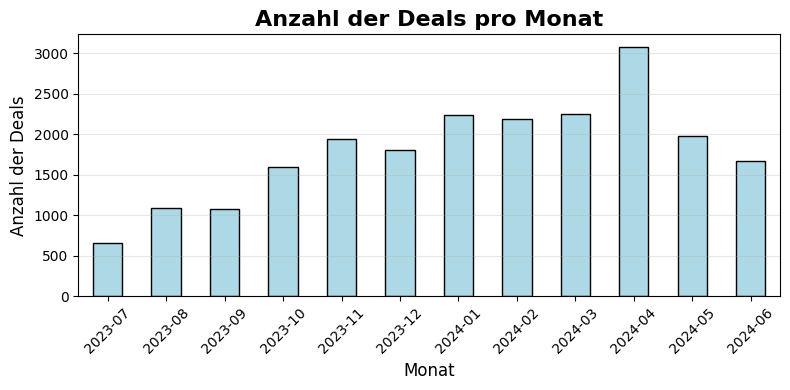

In [22]:
deals_by_month = deals_with_contacts.groupby('Creation Month').size()
plt.figure(figsize=(8, 4))
deals_by_month.plot(kind='bar', color='lightblue', edgecolor='black')
plt.title('Anzahl der Deals pro Monat', fontsize=16, fontweight='bold')
plt.xlabel('Monat', fontsize=12)
plt.ylabel('Anzahl der Deals', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# **<a name='9'>9.  Analyse der Handelsschlusszeiten</a><br>**

In [23]:
closed_deals = deals_with_contacts[deals_with_contacts['Closing Date'].notna() & deals_with_contacts['Deal Age (days)'].notna()].copy()

# Negative Werte entfernen (Datenfehler)
closed_deals = closed_deals[closed_deals['Deal Age (days)'] >= 0]

print(f"Durchschnittliche Deal-Laufzeit: {closed_deals['Deal Age (days)'].mean():.1f} Tage")
print(f"Median der Deal-Laufzeit: {closed_deals['Deal Age (days)'].median():.1f} Tage")
print(f"Kürzeste Laufzeit: {closed_deals['Deal Age (days)'].min()} Tage")
print(f"Längste Laufzeit: {closed_deals['Deal Age (days)'].max()} Tage")

Durchschnittliche Deal-Laufzeit: 18.3 Tage
Median der Deal-Laufzeit: 5.0 Tage
Kürzeste Laufzeit: 0.0 Tage
Längste Laufzeit: 334.0 Tage


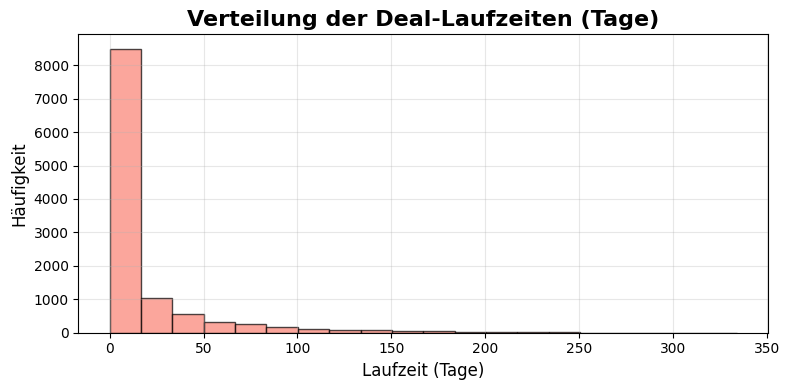

In [21]:
# Verteilung visualisieren
plt.figure(figsize=(8, 4))
plt.hist(closed_deals['Deal Age (days)'].dropna(), bins=20, edgecolor='black', alpha=0.7, color='salmon')
plt.title('Verteilung der Deal-Laufzeiten (Tage)', fontsize=16, fontweight='bold')
plt.xlabel('Laufzeit (Tage)', fontsize=12)
plt.ylabel('Häufigkeit', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

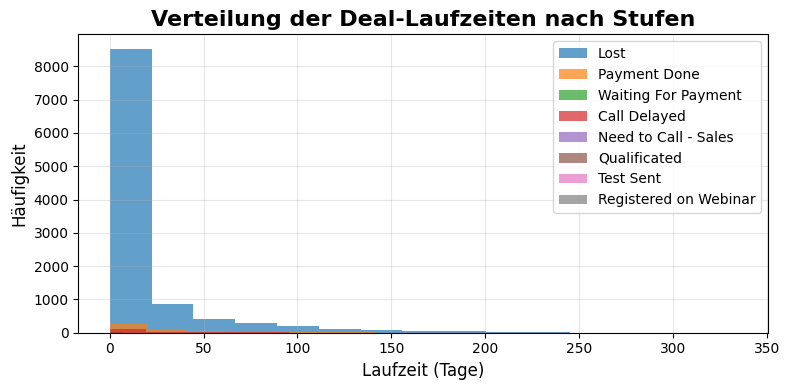

In [24]:
# Verteilung nach Stufen (Stage)

plt.figure(figsize=(8, 4))
for stage in closed_deals['Stage'].unique():
    stage_data = closed_deals[closed_deals['Stage'] == stage]['Deal Age (days)']
    if len(stage_data) > 1:
        plt.hist(stage_data, alpha=0.7, label=stage, bins=15)
plt.title('Verteilung der Deal-Laufzeiten nach Stufen', fontsize=16, fontweight='bold')
plt.xlabel('Laufzeit (Tage)', fontsize=12)
plt.ylabel('Häufigkeit', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


# **<a name='10'>10. ANALYSE DER KAMPAGNENWIRKSAMKEIT</a><br>**

In [25]:
campaign_data = deals_with_contacts[deals_with_contacts['Campaign'] != 'Unknown'].copy()
campaign_data


,Id,Deal Owner Name,Closing Date,Quality,Stage,Lost Reason,Page,Campaign,SLA,Content,...,City,Level of Deutsch,Creation Date,Creation Month,Deal Age (days),Id_Contact,Contact Owner (from Contacts),Contact Created Time,Modified Time,Owner Match
0,5805028000056864695,Ben Hall,NaT,Unknown,New Lead,Unknown,/eng/test,03.07.23women,NaN,v16,...,Unknown,Unknown,2024-06-21,2024-06,NaN,5805028000056849495,Ben Hall,2024-06-21 15:30:00,2024-06-21 15:30:00,True
2,5805028000056832357,Ulysses Adams,2024-06-21,D - Non Target,Lost,Non target,/at-eng,engwien_AT,00:26:43,b1-at,...,Unknown,Unknown,2024-06-21,2024-06,-1.0,5805028000056854421,Ulysses Adams,2024-06-21 14:45:00,2024-06-21 14:45:00,True
3,5805028000056824246,Eva Kent,2024-06-21,E - Non Qualified,Lost,Invalid number,/eng,04.07.23recentlymoved_DE,01:00:04,bloggersvideo14com,...,Unknown,Unknown,2024-06-21,2024-06,-1.0,5805028000056889351,Eva Kent,2024-06-21 13:32:00,2024-06-21 15:32:00,True
4,5805028000056873292,Ben Hall,2024-06-21,D - Non Target,Lost,Non target,/eng,discovery_DE,00:53:12,website,...,Unknown,Unknown,2024-06-21,2024-06,-1.0,5805028000056876176,Ben Hall,2024-06-21 13:21:00,2024-06-21 15:21:00,True
5,5805028000056828429,Paula Underwood,NaT,Unknown,Need a consultation,Unknown,/eng,youtube_shorts_DE,01:33:10,bloggersvideo2june,...,Unknown,Unknown,2024-06-21,2024-06,NaN,5805028000056833279,Paula Underwood,2024-06-21 13:02:00,2024-06-21 15:03:00,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21587,5805028000000935025,Kevin Parker,2023-07-06,E - Non Qualified,Lost,Doesn't Answer,eng/digital-marketing,02.07.23wide_DE,NaN,b3,...,Unknown,Unknown,2023-07-04,2023-07,1.0,5805028000000983028,Bob Brown,2023-07-04 09:34:00,2023-07-17 19:43:00,False
21588,5805028000000970006,Jane Smith,2023-07-04,E - Non Qualified,Lost,Duplicate,eng/digital-marketing,03.07.23women,NaN,b3,...,Unknown,Unknown,2023-07-04,2023-07,-1.0,5805028000000979006,Jane Smith,2023-07-04 07:10:00,2024-05-26 19:26:00,True
21589,5805028000000948010,Jane Smith,2023-08-29,B - Medium,Lost,needs time to think,eng/digital-marketing,03.07.23women,NaN,b3,...,Unknown,Unknown,2023-07-04,2023-07,55.0,5805028000000979006,Jane Smith,2023-07-04 07:10:00,2024-05-26 19:26:00,True
21590,5805028000000945016,Jane Smith,2023-08-29,A - High,Lost,Changed Decision,eng/digital-marketing,02.07.23wide_DE,"56 days, 19:01:59",b3,...,Unknown,Unknown,2023-07-03,2023-07,56.0,5805028000000968001,Jane Smith,2023-07-03 20:39:00,2024-06-18 10:10:00,True


In [26]:
campaign_stats = campaign_data.groupby('Campaign').agg({
            'Id': 'count',
            'Stage': lambda x: (x == 'Payment Done').sum(),
            'Offer Total Amount': lambda x: x.sum() if x.notna().any() else 0
        }).rename(columns={'Id': 'Total Deals', 'Stage': 'Won Deals'})

campaign_stats['Conversion Rate'] = (campaign_stats['Won Deals'] / campaign_stats['Total Deals'] * 100).round(2)
campaign_stats = campaign_stats.sort_values('Conversion Rate', ascending=False)

In [27]:
campaign_stats

,Total Deals,Won Deals,Offer Total Amount,Conversion Rate
Campaign,,,,
domain,1,1,5000.0,100.00
hanna,1,1,11000.0,100.00
referral,3,1,4000.0,33.33
web2311_DE,10,3,16000.0,30.00
web1312_DE,11,2,66500.0,18.18
...,...,...,...,...
welt_DE,2,0,0.0,0.00
work_wr,6,0,0.0,0.00
workingin_DE,48,0,42000.0,0.00


In [28]:
top_campaigns = campaign_stats.head(10)
top_campaigns

,Total Deals,Won Deals,Offer Total Amount,Conversion Rate
Campaign,,,,
domain,1,1,5000.0,100.00
hanna,1,1,11000.0,100.00
referral,3,1,4000.0,33.33
web2311_DE,10,3,16000.0,30.00
web1312_DE,11,2,66500.0,18.18
2005_Lost_DE,6,1,33000.0,16.67
Aussiedler_DE,6,1,16000.0,16.67
col_DE,6,1,20200.0,16.67
05.09.2023wide_DE,6,1,15000.0,16.67


# **<a name='11'>11. Visualisierung der Top 10 Conversion-Kampagnen</a><br>**

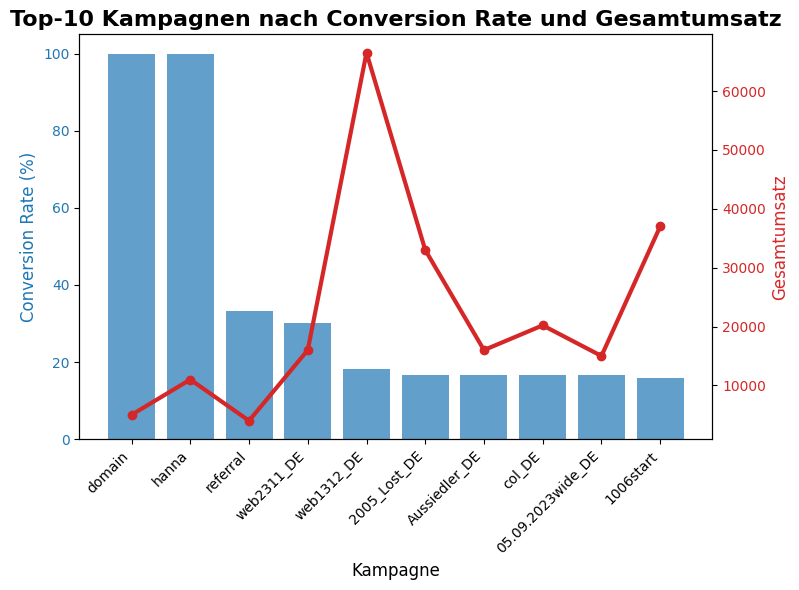

In [29]:
fig, ax1 = plt.subplots(figsize=(8, 6))

color = 'tab:blue'
ax1.set_xlabel('Kampagne', fontsize=12)
ax1.set_ylabel('Conversion Rate (%)', color=color, fontsize=12)
bars = ax1.bar(range(len(top_campaigns)), top_campaigns['Conversion Rate'], color=color, alpha=0.7, label='Conversion Rate')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xticks(range(len(top_campaigns)))
ax1.set_xticklabels(top_campaigns.index, rotation=45, ha='right')

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Gesamtumsatz', color=color, fontsize=12)
line = ax2.plot(range(len(top_campaigns)), top_campaigns['Offer Total Amount'], color=color, marker='o', linewidth=3, label='Umsatz')
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Top-10 Kampagnen nach Conversion Rate und Gesamtumsatz', fontsize=16, fontweight='bold')
fig.tight_layout()
plt.show()

# **<a name='12'>12. Effektivität von Marketingquellen</a><br>**

In [30]:
source_data = deals_with_contacts[deals_with_contacts['Source'] != 'Unknown'].copy()
source_data

,Id,Deal Owner Name,Closing Date,Quality,Stage,Lost Reason,Page,Campaign,SLA,Content,...,City,Level of Deutsch,Creation Date,Creation Month,Deal Age (days),Id_Contact,Contact Owner (from Contacts),Contact Created Time,Modified Time,Owner Match
0,5805028000056864695,Ben Hall,NaT,Unknown,New Lead,Unknown,/eng/test,03.07.23women,NaN,v16,...,Unknown,Unknown,2024-06-21,2024-06,NaN,5805028000056849495,Ben Hall,2024-06-21 15:30:00,2024-06-21 15:30:00,True
1,5805028000056859489,Ulysses Adams,NaT,Unknown,New Lead,Unknown,/at-eng,Unknown,NaN,Unknown,...,Unknown,Unknown,2024-06-21,2024-06,NaN,5805028000056834471,Ulysses Adams,2024-06-21 15:23:00,2024-06-21 15:24:00,True
2,5805028000056832357,Ulysses Adams,2024-06-21,D - Non Target,Lost,Non target,/at-eng,engwien_AT,00:26:43,b1-at,...,Unknown,Unknown,2024-06-21,2024-06,-1.0,5805028000056854421,Ulysses Adams,2024-06-21 14:45:00,2024-06-21 14:45:00,True
3,5805028000056824246,Eva Kent,2024-06-21,E - Non Qualified,Lost,Invalid number,/eng,04.07.23recentlymoved_DE,01:00:04,bloggersvideo14com,...,Unknown,Unknown,2024-06-21,2024-06,-1.0,5805028000056889351,Eva Kent,2024-06-21 13:32:00,2024-06-21 15:32:00,True
4,5805028000056873292,Ben Hall,2024-06-21,D - Non Target,Lost,Non target,/eng,discovery_DE,00:53:12,website,...,Unknown,Unknown,2024-06-21,2024-06,-1.0,5805028000056876176,Ben Hall,2024-06-21 13:21:00,2024-06-21 15:21:00,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21588,5805028000000970006,Jane Smith,2023-07-04,E - Non Qualified,Lost,Duplicate,eng/digital-marketing,03.07.23women,NaN,b3,...,Unknown,Unknown,2023-07-04,2023-07,-1.0,5805028000000979006,Jane Smith,2023-07-04 07:10:00,2024-05-26 19:26:00,True
21589,5805028000000948010,Jane Smith,2023-08-29,B - Medium,Lost,needs time to think,eng/digital-marketing,03.07.23women,NaN,b3,...,Unknown,Unknown,2023-07-04,2023-07,55.0,5805028000000979006,Jane Smith,2023-07-04 07:10:00,2024-05-26 19:26:00,True
21590,5805028000000945016,Jane Smith,2023-08-29,A - High,Lost,Changed Decision,eng/digital-marketing,02.07.23wide_DE,"56 days, 19:01:59",b3,...,Unknown,Unknown,2023-07-03,2023-07,56.0,5805028000000968001,Jane Smith,2023-07-03 20:39:00,2024-06-18 10:10:00,True
21591,5805028000000927004,Bob Brown,2023-07-09,D - Non Target,Lost,Does not speak English,eng/digital-marketing,03.07.23women,NaN,b3,...,Unknown,Unknown,2023-07-03,2023-07,5.0,5805028000000961001,Bob Brown,2023-07-03 20:17:00,2023-10-05 10:44:00,True


In [31]:
source_stats = source_data.groupby('Source').agg({
            'Id': 'count',
            'Stage': lambda x: (x == 'Payment Done').sum(),
            'Quality': lambda x: x.isin(['A - High', 'B - Medium']).sum()
        }).rename(columns={'Id': 'Total Leads', 'Stage': 'Converted Leads', 'Quality': 'High Quality Leads'})

source_stats['Conversion Rate'] = (source_stats['Converted Leads'] / source_stats['Total Leads'] * 100).round(2)
source_stats['High Quality Rate'] = (source_stats['High Quality Leads'] / source_stats['Total Leads'] * 100).round(2)
source_stats = source_stats.sort_values('Conversion Rate', ascending=False)



In [32]:
top_sources = source_stats.head(10)
top_sources

,Total Leads,Converted Leads,High Quality Leads,Conversion Rate,High Quality Rate
Source,,,,,
Webinar,379,26,48,6.86,12.66
Organic,2590,147,276,5.68,10.66
SMM,1730,91,165,5.26,9.54
Facebook Ads,4850,202,584,4.16,12.04
Google Ads,4226,173,405,4.09,9.58
Telegram posts,1001,40,108,4.00,10.79
Bloggers,1089,39,105,3.58,9.64
Youtube Ads,1657,53,129,3.20,7.79
Tiktok Ads,2051,56,121,2.73,5.90


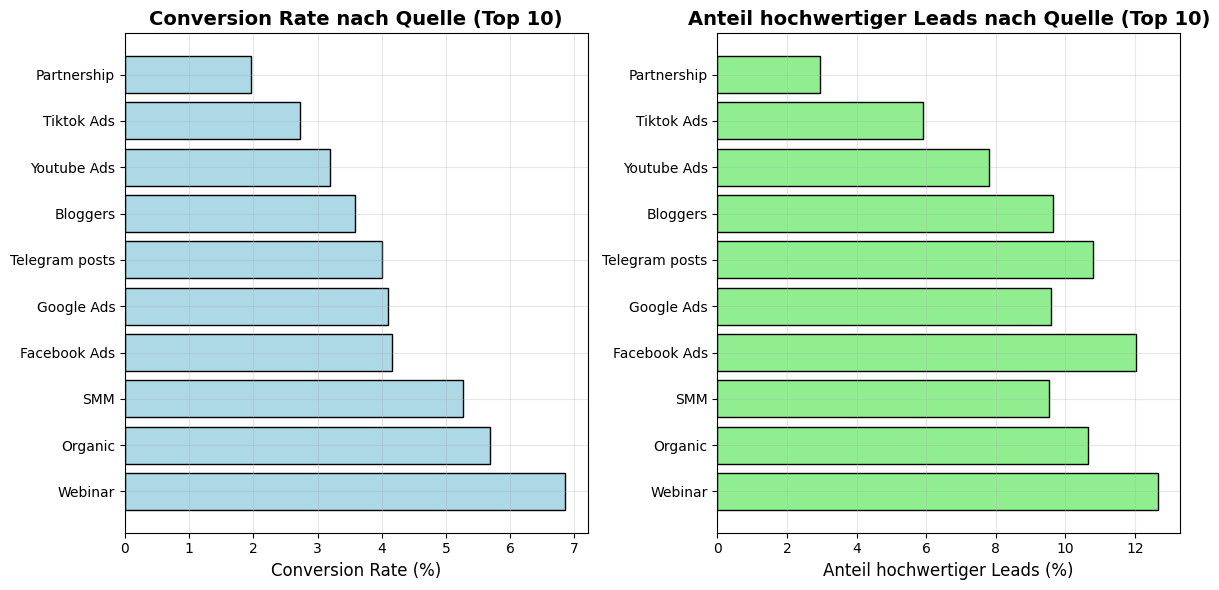

In [33]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Conversion Rate
ax[0].barh(top_sources.index, top_sources['Conversion Rate'], color='lightblue', edgecolor='black')
ax[0].set_title('Conversion Rate nach Quelle (Top 10)', fontsize=14, fontweight='bold')
ax[0].set_xlabel('Conversion Rate (%)', fontsize=12)
ax[0].grid(True, alpha=0.3)

# Lead-Qualität
ax[1].barh(top_sources.index, top_sources['High Quality Rate'], color='lightgreen', edgecolor='black')
ax[1].set_title('Anteil hochwertiger Leads nach Quelle (Top 10)', fontsize=14, fontweight='bold')
ax[1].set_xlabel('Anteil hochwertiger Leads (%)', fontsize=12)
ax[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# **<a name='13'>13. Leistungsanalyse der Verkaufsabteilung</a><br>**

In [34]:
# Analyse der Effektivität der Kontakt-Besitzer (aus Contacts-Tabelle)
contact_owner_data = deals_with_contacts[deals_with_contacts['Contact Owner (from Contacts)'] != 'Unknown'].copy()

contact_owner_stats = contact_owner_data.groupby('Contact Owner (from Contacts)').agg({
            'Id': 'count',
            'Stage': lambda x: (x == 'Payment Done').sum(),
            'Offer Total Amount': lambda x: x.sum() if x.notna().any() else 0,
            'Initial Amount Paid': lambda x: x.sum() if x.notna().any() else 0
        }).rename(columns={'Id': 'Total Deals', 'Stage': 'Won Deals'})

contact_owner_stats['Conversion Rate'] = (contact_owner_stats['Won Deals'] / contact_owner_stats['Total Deals'] * 100).round(2)
contact_owner_stats['Avg Deal Size'] = (contact_owner_stats['Offer Total Amount'] / contact_owner_stats['Won Deals']).round(2)
contact_owner_stats = contact_owner_stats.sort_values('Offer Total Amount', ascending=False)

In [35]:
top_contact_owners = contact_owner_stats.head(10)
top_contact_owners

,Total Deals,Won Deals,Offer Total Amount,Initial Amount Paid,Conversion Rate,Avg Deal Size
Contact Owner (from Contacts),,,,,,
Ulysses Adams,2306,148,5536505.8,575700.0,6.42,37408.82
Julia Nelson,2168,104,4878124.6,392521.5,4.80,46905.04
Charlie Davis,2429,132,3390720.3,382914.0,5.43,25687.28
Paula Underwood,1644,96,2788500.0,315657.0,5.84,29046.88
Nina Scott,1375,54,2221502.9,228900.0,3.93,41138.94
Victor Barnes,1106,43,2092800.0,328107.0,3.89,48669.77
Jane Smith,919,42,1866500.0,188800.0,4.57,44440.48
Ben Hall,1095,41,1824005.8,215303.5,3.74,44487.95
Quincy Vincent,1556,58,1641502.9,208201.0,3.73,28301.77


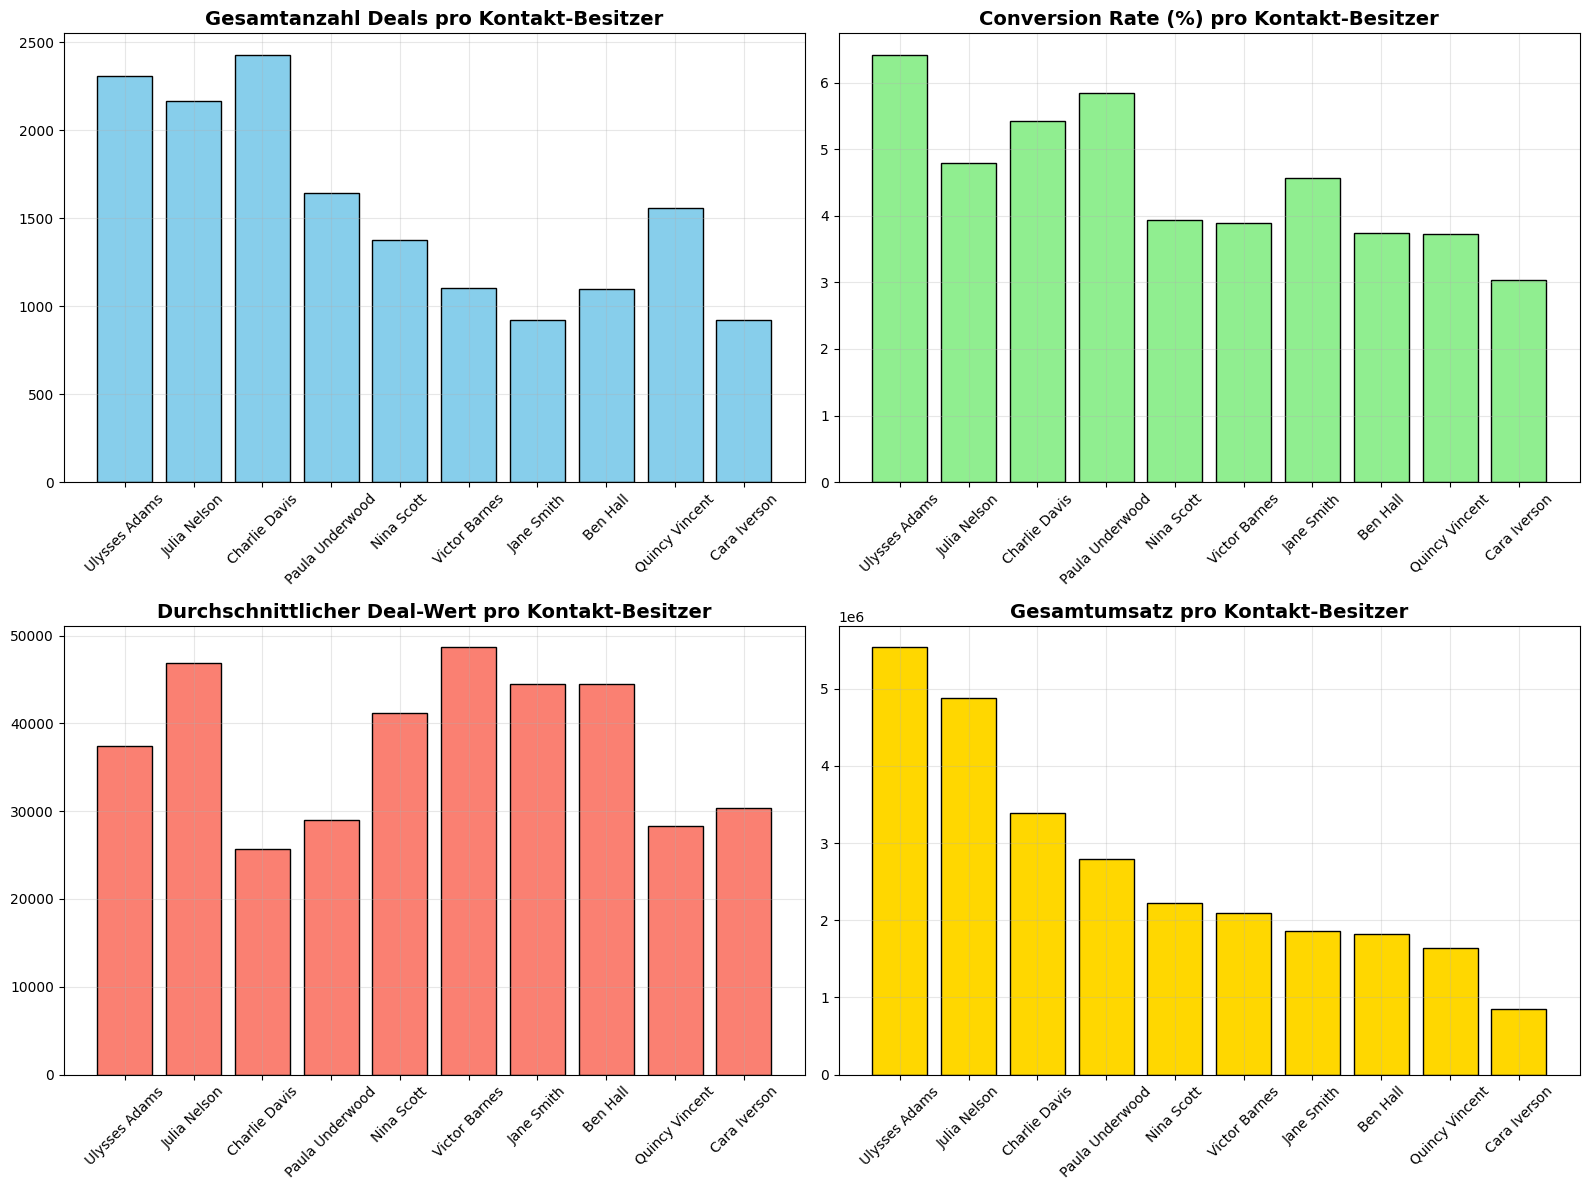

In [36]:
fig, ax = plt.subplots(2, 2, figsize=(16, 12))

# Gesamtanzahl Deals
ax[0, 0].bar(top_contact_owners.index, top_contact_owners['Total Deals'], color='skyblue', edgecolor='black')
ax[0, 0].set_title('Gesamtanzahl Deals pro Kontakt-Besitzer', fontsize=14, fontweight='bold')
ax[0, 0].tick_params(axis='x', rotation=45)
ax[0, 0].grid(True, alpha=0.3)

# Conversion Rate
ax[0, 1].bar(top_contact_owners.index, top_contact_owners['Conversion Rate'], color='lightgreen', edgecolor='black')
ax[0, 1].set_title('Conversion Rate (%) pro Kontakt-Besitzer', fontsize=14, fontweight='bold')
ax[0, 1].tick_params(axis='x', rotation=45)
ax[0, 1].grid(True, alpha=0.3)

# Durchschnittlicher Deal-Wert
ax[1, 0].bar(top_contact_owners.index, top_contact_owners['Avg Deal Size'], color='salmon', edgecolor='black')
ax[1, 0].set_title('Durchschnittlicher Deal-Wert pro Kontakt-Besitzer', fontsize=14, fontweight='bold')
ax[1, 0].tick_params(axis='x', rotation=45)
ax[1, 0].grid(True, alpha=0.3)

# Gesamtumsatz
ax[1, 1].bar(top_contact_owners.index, top_contact_owners['Offer Total Amount'], color='gold', edgecolor='black')
ax[1, 1].set_title('Gesamtumsatz pro Kontakt-Besitzer', fontsize=14, fontweight='bold')
ax[1, 1].tick_params(axis='x', rotation=45)
ax[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# **<a name='14'>14. Analyse der Deal Owner-Leistung</a><br>**

In [37]:
deal_owner_data = deals_with_contacts[deals_with_contacts['Deal Owner Name'] != 'Unknown'].copy()

deal_owner_stats = deal_owner_data.groupby('Deal Owner Name').agg({
            'Id': 'count',
            'Stage': lambda x: (x == 'Payment Done').sum(),
            'Offer Total Amount': lambda x: x.sum() if x.notna().any() else 0,
            'Initial Amount Paid': lambda x: x.sum() if x.notna().any() else 0
        }).rename(columns={'Id': 'Total Deals', 'Stage': 'Won Deals'})

deal_owner_stats['Conversion Rate'] = (deal_owner_stats['Won Deals'] / deal_owner_stats['Total Deals'] * 100).round(2)
deal_owner_stats['Avg Deal Size'] = (deal_owner_stats['Offer Total Amount'] / deal_owner_stats['Won Deals']).round(2)
deal_owner_stats = deal_owner_stats.sort_values('Offer Total Amount', ascending=False)
top_deal_owners = deal_owner_stats.head(10)
top_deal_owners

,Total Deals,Won Deals,Offer Total Amount,Initial Amount Paid,Conversion Rate,Avg Deal Size
Deal Owner Name,,,,,,
Ulysses Adams,2165,141,5101005.8,540050.0,6.51,36177.35
Julia Nelson,2241,93,4692124.6,372471.5,4.15,50452.95
Charlie Davis,2963,148,3802220.3,428117.5,4.99,25690.68
Paula Underwood,1862,93,2842000.0,323253.5,4.99,30559.14
Victor Barnes,1232,44,2196800.0,341907.0,3.57,49927.27
Ben Hall,1345,46,2025005.8,238203.5,3.42,44021.87
Nina Scott,1283,46,1948502.9,206150.0,3.59,42358.76
Quincy Vincent,1884,65,1786002.9,221601.0,3.45,27476.97
Oliver Taylor,163,50,1660500.0,149153.5,30.67,33210.00


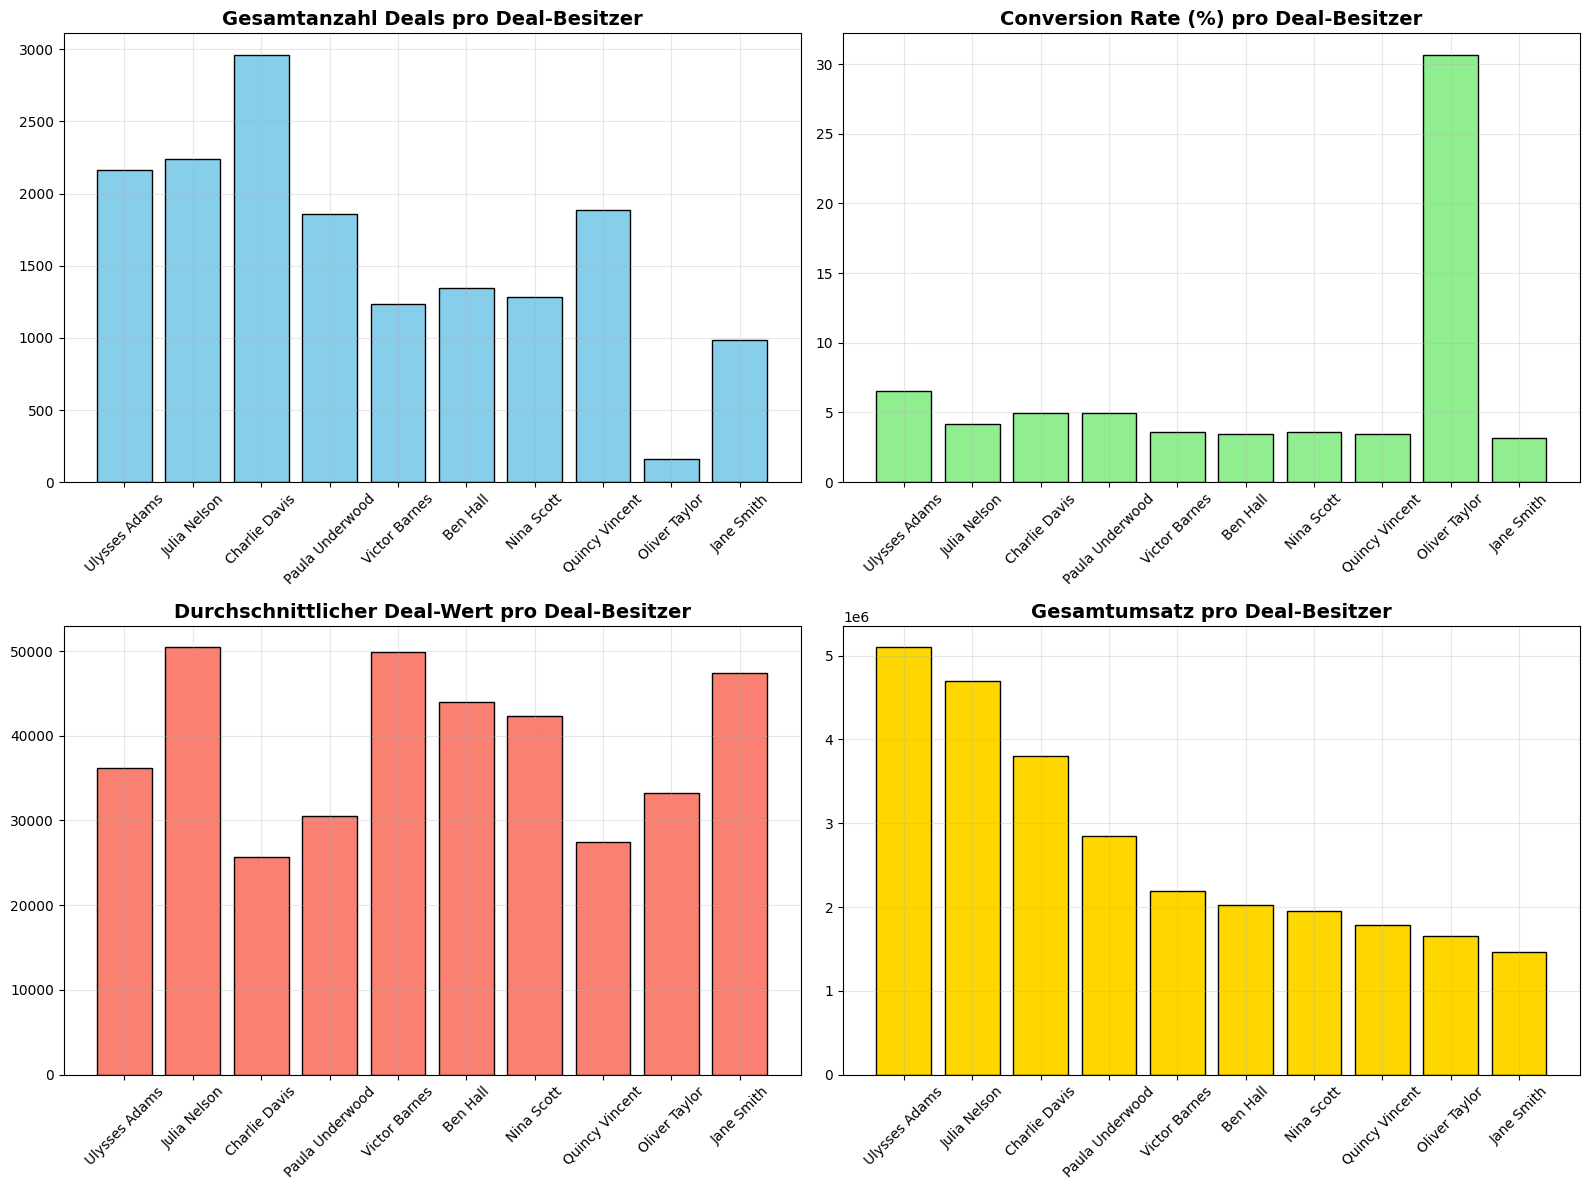

In [38]:
fig, ax = plt.subplots(2, 2, figsize=(16, 12))
# Gesamtanzahl Deals
ax[0, 0].bar(top_deal_owners.index, top_deal_owners['Total Deals'], color='skyblue', edgecolor='black')
ax[0, 0].set_title('Gesamtanzahl Deals pro Deal-Besitzer', fontsize=14, fontweight='bold')
ax[0, 0].tick_params(axis='x', rotation=45)
ax[0, 0].grid(True, alpha=0.3)

# Conversion Rate
ax[0, 1].bar(top_deal_owners.index, top_deal_owners['Conversion Rate'], color='lightgreen', edgecolor='black')
ax[0, 1].set_title('Conversion Rate (%) pro Deal-Besitzer', fontsize=14, fontweight='bold')
ax[0, 1].tick_params(axis='x', rotation=45)
ax[0, 1].grid(True, alpha=0.3)

# Durchschnittlicher Deal-Wert
ax[1, 0].bar(top_deal_owners.index, top_deal_owners['Avg Deal Size'], color='salmon', edgecolor='black')
ax[1, 0].set_title('Durchschnittlicher Deal-Wert pro Deal-Besitzer', fontsize=14, fontweight='bold')
ax[1, 0].tick_params(axis='x', rotation=45)
ax[1, 0].grid(True, alpha=0.3)

# Gesamtumsatz
ax[1, 1].bar(top_deal_owners.index, top_deal_owners['Offer Total Amount'], color='gold', edgecolor='black')
ax[1, 1].set_title('Gesamtumsatz pro Deal-Besitzer', fontsize=14, fontweight='bold')
ax[1, 1].tick_params(axis='x', rotation=45)
ax[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# **<a name='15'>15. ZAHLUNGS- UND PRODUKTANALYSE</a><br>**

In [39]:
# Zahlungsarten analysieren
payment_data = deals_with_contacts[(deals_with_contacts['Payment Type'] != 'Unknown') & (deals_with_contacts['Stage'] == 'Payment Done')].copy()
payment_stats = payment_data.groupby('Payment Type').agg({
            'Id': 'count',
            'Offer Total Amount': lambda x: x.sum() if x.notna().any() else 0
        }).rename(columns={'Id': 'Number of Deals'})

payment_stats['Avg Deal Size'] = (payment_stats['Offer Total Amount'] / payment_stats['Number of Deals']).round(2)
payment_stats = payment_stats.sort_values('Number of Deals', ascending=False)

In [40]:
payment_stats

,Number of Deals,Offer Total Amount,Avg Deal Size
Payment Type,,,
Recurring Payments,250,1106505.8,4426.02
One Payment,113,366027.1,3239.18
Reservation,1,2500.0,2500.00


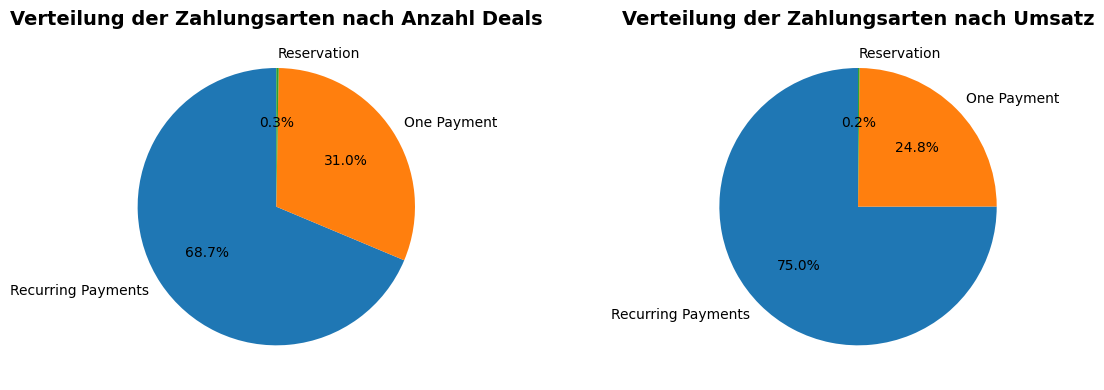

In [41]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

ax[0].pie(payment_stats['Number of Deals'], labels=payment_stats.index, autopct='%1.1f%%', startangle=90)
ax[0].set_title('Verteilung der Zahlungsarten nach Anzahl Deals', fontsize=14, fontweight='bold')

ax[1].pie(payment_stats['Offer Total Amount'], labels=payment_stats.index, autopct='%1.1f%%', startangle=90)
ax[1].set_title('Verteilung der Zahlungsarten nach Umsatz', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

In [42]:
# Produktanalyse

product_data = deals_with_contacts[deals_with_contacts['Product'] != 'Unknown'].copy()
product_stats = product_data.groupby('Product').agg({
            'Id': 'count',
            'Stage': lambda x: (x == 'Payment Done').sum(),
            'Offer Total Amount': lambda x: x.sum() if x.notna().any() else 0
        }).rename(columns={'Id': 'Total Deals', 'Stage': 'Won Deals'})

product_stats['Conversion Rate'] = (product_stats['Won Deals'] / product_stats['Total Deals'] * 100).round(2)
product_stats['Avg Deal Size'] = (product_stats['Offer Total Amount'] / product_stats['Won Deals']).round(2)
product_stats = product_stats.sort_values('Offer Total Amount', ascending=False)

In [43]:
product_stats

,Total Deals,Won Deals,Offer Total Amount,Conversion Rate,Avg Deal Size
Product,,,,,
Digital Marketing,1990,474,19071140.0,23.82,40234.47
UX/UI Design,1022,229,8879502.9,22.41,38775.12
Web Developer,575,137,2858026.1,23.83,20861.50
Data Analytics,1,0,6000.0,0.00,inf
Find yourself in IT,4,1,1.0,25.00,1.00


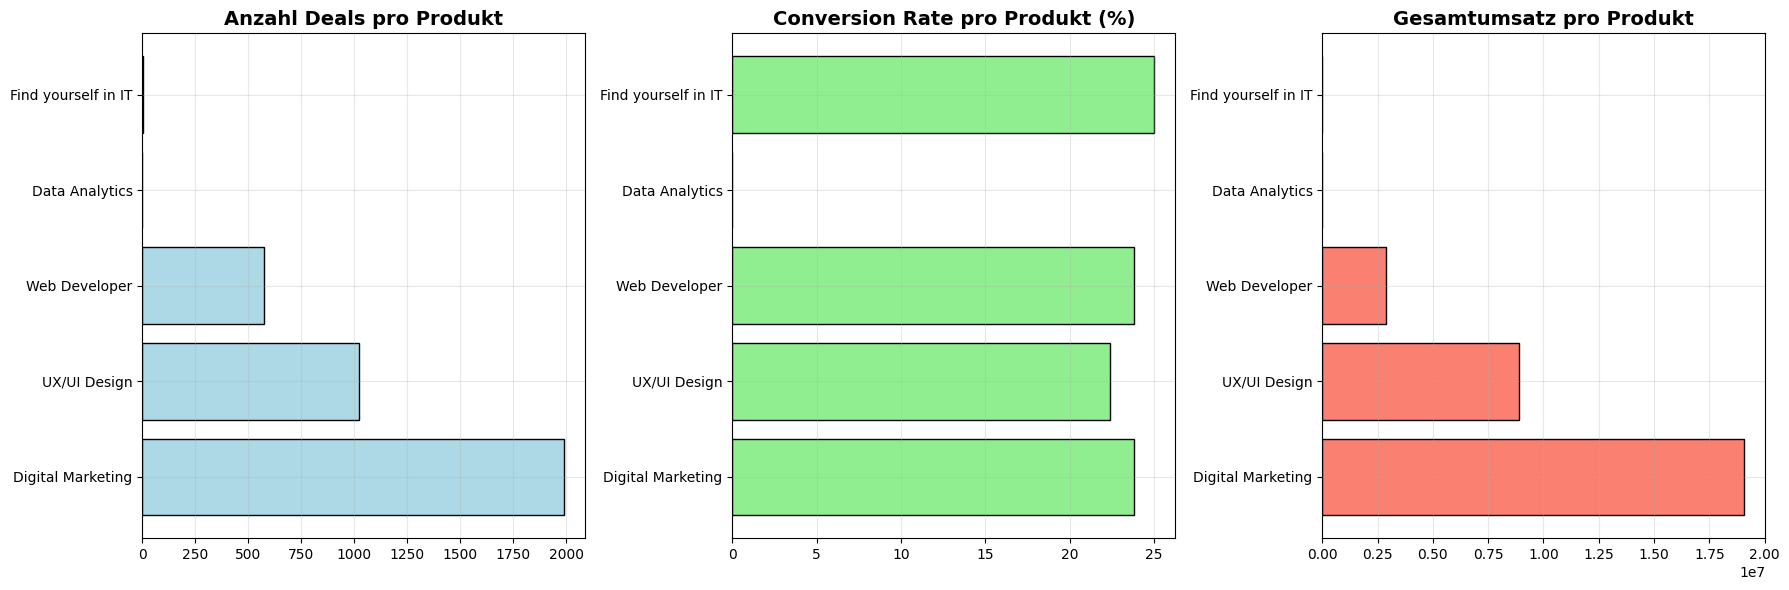

In [44]:
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

# Anzahl Deals
ax[0].barh(product_stats.index, product_stats['Total Deals'], color='lightblue', edgecolor='black')
ax[0].set_title('Anzahl Deals pro Produkt', fontsize=14, fontweight='bold')
ax[0].grid(True, alpha=0.3)

# Conversion Rate
ax[1].barh(product_stats.index, product_stats['Conversion Rate'], color='lightgreen', edgecolor='black')
ax[1].set_title('Conversion Rate pro Produkt (%)', fontsize=14, fontweight='bold')
ax[1].grid(True, alpha=0.3)

# Gesamtumsatz
ax[2].barh(product_stats.index, product_stats['Offer Total Amount'], color='salmon', edgecolor='black')
ax[2].set_title('Gesamtumsatz pro Produkt', fontsize=14, fontweight='bold')
ax[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# **<a name='16'>16. GEOGRAFISCHE ANALYSE</a><br>**

In [45]:
# Geografische Verteilung

city_data = deals_with_contacts[deals_with_contacts['City'] != 'Unknown'].copy()
city_stats = city_data.groupby('City').agg({
            'Id': 'count',
            'Stage': lambda x: (x == 'Payment Done').sum(),
            'Offer Total Amount': lambda x: x.sum() if x.notna().any() else 0
        }).rename(columns={'Id': 'Total Deals', 'Stage': 'Won Deals'})

city_stats['Conversion Rate'] = (city_stats['Won Deals'] / city_stats['Total Deals'] * 100).round(2)
city_stats['Avg Deal Size'] = (city_stats['Offer Total Amount'] / city_stats['Won Deals']).round(2)
city_stats = city_stats.sort_values('Offer Total Amount', ascending=False)


In [46]:
# Daten bereinigen: 'Unknown' und '-' ausschließen
city_data = deals_with_contacts[
    (deals_with_contacts['City'] != 'Unknown') &
    (deals_with_contacts['City'] != '-')
].copy()

# Aggregieren
city_stats = city_data.groupby('City').agg({
    'Id': 'count',
    'Stage': lambda x: (x == 'Payment Done').sum(),
    'Offer Total Amount': lambda x: x.sum() if x.notna().any() else 0
}).rename(columns={'Id': 'Total Deals', 'Stage': 'Won Deals'})

# Kennzahlen berechnen
city_stats['Conversion Rate'] = (city_stats['Won Deals'] / city_stats['Total Deals'] * 100).round(2)
city_stats['Avg Deal Size'] = (city_stats['Offer Total Amount'] / city_stats['Won Deals']).round(2)

# Sortieren
city_stats = city_stats.sort_values('Offer Total Amount', ascending=False)


In [47]:
city_stats.head(10)

,Total Deals,Won Deals,Offer Total Amount,Conversion Rate,Avg Deal Size
City,,,,,
Berlin,182,78,1491005.8,42.86,19115.46
München,74,27,611000.0,36.49,22629.63
Hamburg,62,22,500002.9,35.48,22727.40
Leipzig,45,18,418000.0,40.00,23222.22
Nürnberg,45,9,389502.9,20.00,43278.10
Düsseldorf,33,7,284500.0,21.21,40642.86
Dresden,28,9,262000.0,32.14,29111.11
Dortmund,26,4,228500.0,15.38,57125.00
Köln,25,9,219700.0,36.00,24411.11


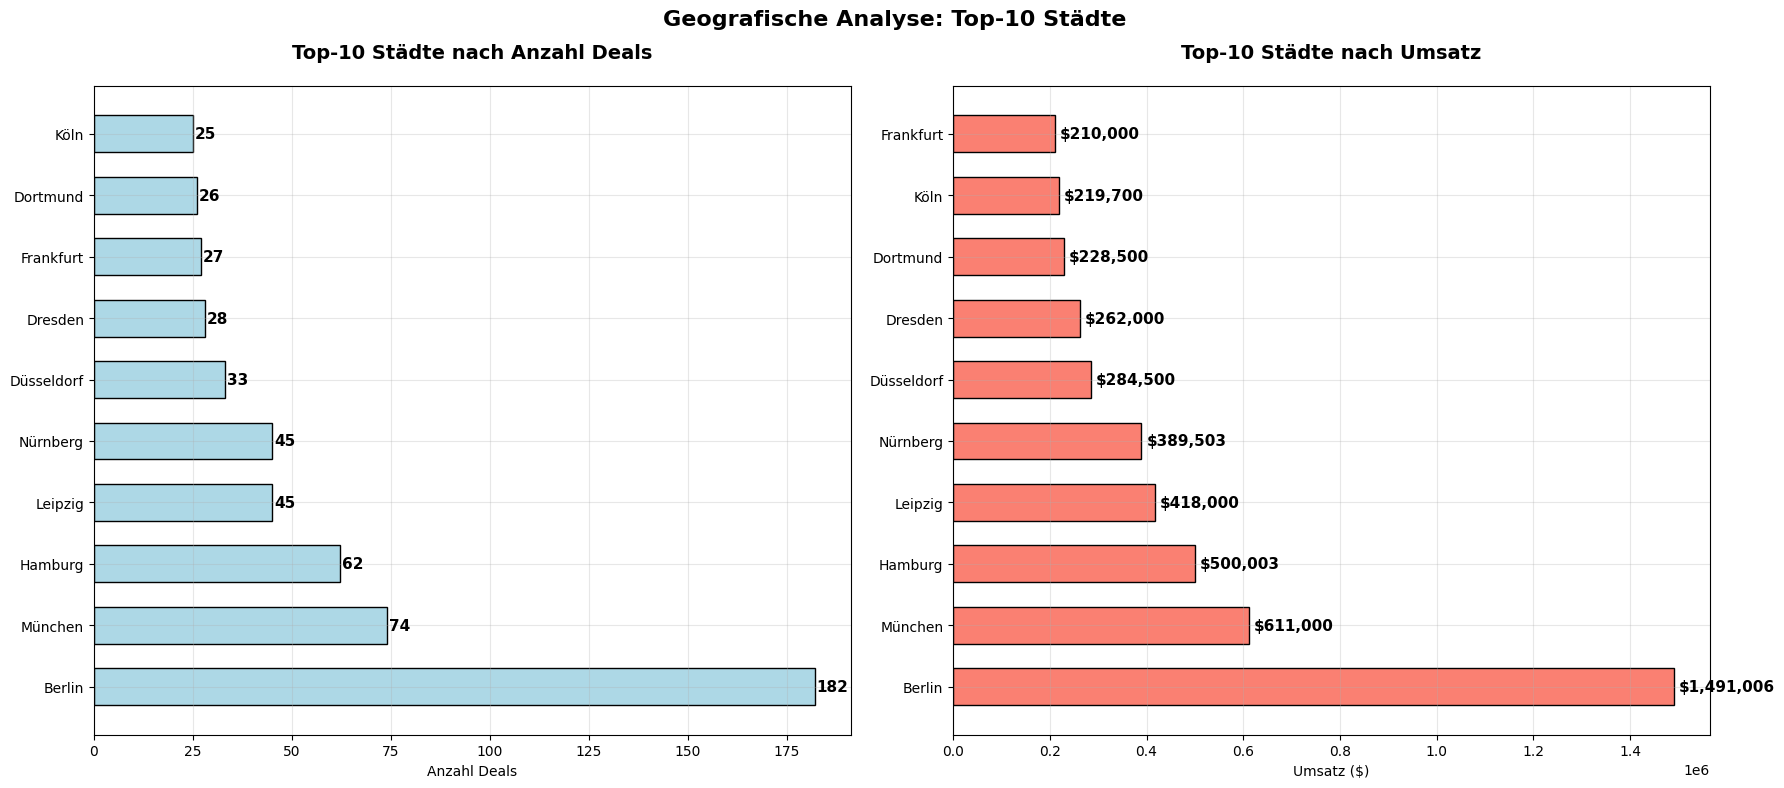

In [48]:
fig, ax = plt.subplots(1, 2, figsize=(18, 8))
fig.suptitle('Geografische Analyse: Top-10 Städte', fontsize=16, fontweight='bold')

# 1. Top-10 Städte nach Anzahl Deals
top_by_count = city_stats.sort_values('Total Deals', ascending=False).head(10)
bars1 = ax[0].barh(top_by_count.index, top_by_count['Total Deals'], color='lightblue', edgecolor='black', height=0.6)
ax[0].set_title('Top-10 Städte nach Anzahl Deals', fontsize=14, fontweight='bold', pad=20)
ax[0].grid(True, alpha=0.3)
ax[0].set_xlabel('Anzahl Deals')
# Werte beschriften
for i, v in enumerate(top_by_count['Total Deals']):
    ax[0].text(v + 0.5, i, str(int(v)), color='black', fontweight='bold', va='center', fontsize=11)

# 2. Top-10 Städte nach Umsatz
top_by_revenue = city_stats.sort_values('Offer Total Amount', ascending=False).head(10)
bars2 = ax[1].barh(top_by_revenue.index, top_by_revenue['Offer Total Amount'], color='salmon', edgecolor='black', height=0.6)
ax[1].set_title('Top-10 Städte nach Umsatz', fontsize=14, fontweight='bold', pad=20)
ax[1].grid(True, alpha=0.3)
ax[1].set_xlabel('Umsatz ($)')
# Werte beschriften
for i, v in enumerate(top_by_revenue['Offer Total Amount']):
    ax[1].text(v + 10000, i, f"${v:,.0f}", color='black', fontweight='bold', va='center', fontsize=11)

plt.tight_layout()
plt.show()

# **<a name='17'>17. Analyse nach Stadt und Deutschniveau</a><br>**

In [49]:
# Deutsch-Niveau bereinigen
def clean_german_level(level):
        if pd.isna(level) or level == 'Unknown':
            return 'Unknown'
        level = str(level).lower()
        if 'b1' in level or 'в1' in level or 'б1' in level:
            return 'B1'
        elif 'b2' in level or 'в2' in level or 'б2' in level:
            return 'B2'
        elif 'a2' in level or 'а2' in level:
            return 'A2'
        elif 'a1' in level or 'а1' in level:
            return 'A1'
        elif 'c1' in level or 'с1' in level:
            return 'C1'
        else:
            return 'Other'

deals_with_contacts['Cleaned German Level'] = deals_with_contacts['Level of Deutsch'].apply(clean_german_level)

city_german_data = deals_with_contacts[(deals_with_contacts['City'] != 'Unknown') & (deals_with_contacts['Cleaned German Level'] != 'Unknown')].copy()
city_german_stats = city_german_data.groupby(['City', 'Cleaned German Level']).agg({
                    'Id': 'count',
                    'Stage': lambda x: (x == 'Payment Done').sum()
                }).rename(columns={'Id': 'Total Deals', 'Stage': 'Won Deals'})

city_german_stats['Conversion Rate'] = (city_german_stats['Won Deals'] / city_german_stats['Total Deals'] * 100).round(2)
city_german_stats = city_german_stats.reset_index()

# Filtern: Nur Städte mit ausreichend Daten
city_min_deals = city_german_stats.groupby('City')['Total Deals'].sum()
popular_cities = city_min_deals[city_min_deals >= 3].index
filtered_german = city_german_stats[city_german_stats['City'].isin(popular_cities)]

pivot_table = filtered_german.pivot_table(
                        index='City',
                        columns='Cleaned German Level',
                        values='Conversion Rate',
                        fill_value=0
                    )

In [50]:
pivot_table

Cleaned German Level,A1,A2,B1,B2,C1,Other
City,,,,,,
-,0.0,15.38,37.74,28.0,33.33,16.67
Aachen,0.0,0.00,40.00,0.0,0.00,0.00
Ansbach,0.0,0.00,50.00,0.0,0.00,0.00
Arnsberg,0.0,0.00,66.67,0.0,0.00,0.00
Aschaffenburg,0.0,0.00,66.67,0.0,0.00,0.00
...,...,...,...,...,...,...
Ulm,0.0,0.00,0.00,0.0,0.00,0.00
Villingen-Schwenningen,0.0,0.00,62.50,0.0,0.00,0.00
Wolfsburg,0.0,0.00,75.00,0.0,0.00,0.00


# **<a name='18'>18. Umrechnung(Konvertierung) nach Stadt und Deutschkenntnissen</a><br>**

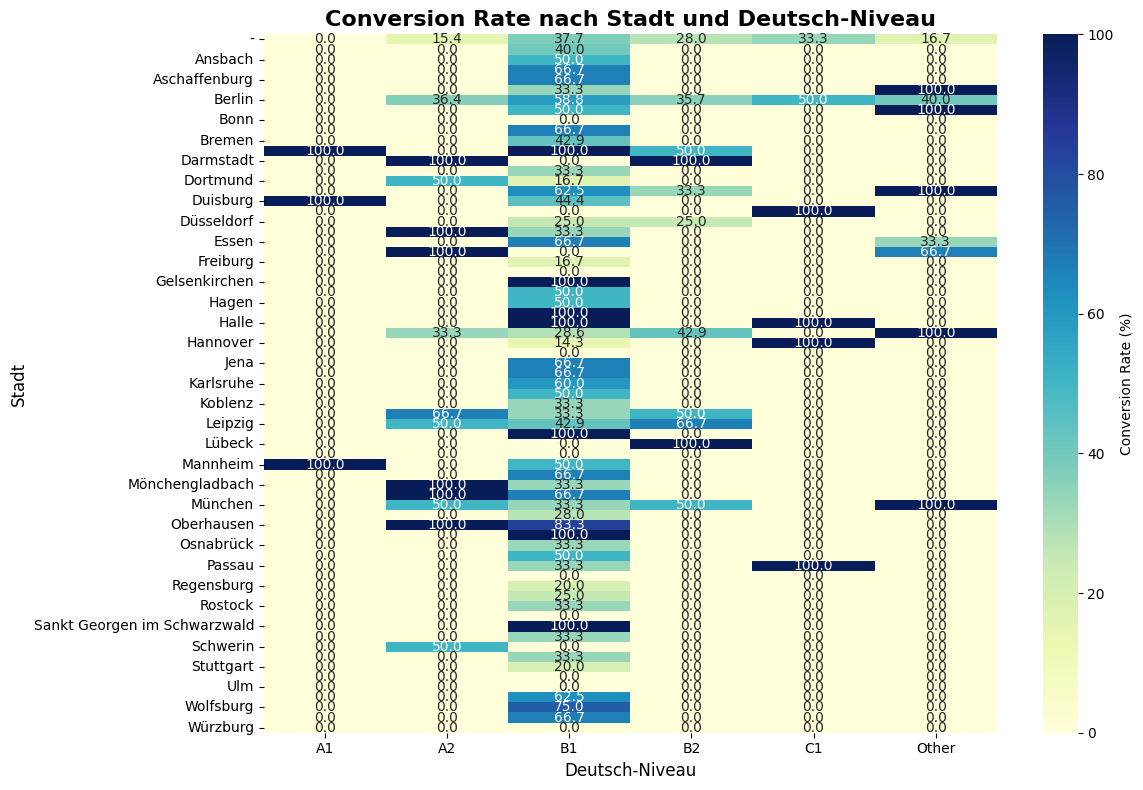

In [51]:
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt='.1f', cbar_kws={'label': 'Conversion Rate (%)'})
plt.title('Conversion Rate nach Stadt und Deutsch-Niveau', fontsize=16, fontweight='bold')
plt.xlabel('Deutsch-Niveau', fontsize=12)
plt.ylabel('Stadt', fontsize=12)
plt.tight_layout()
plt.show()

# **<a name='19'>19. Die effektivsten Manager (Kontaktinhaber)</a><br>**

In [52]:
contact_owner_data = deals_with_contacts[deals_with_contacts['Contact Owner (from Contacts)'] != 'Unknown'].copy()
contact_owner_data

,Id,Deal Owner Name,Closing Date,Quality,Stage,Lost Reason,Page,Campaign,SLA,Content,...,Level of Deutsch,Creation Date,Creation Month,Deal Age (days),Id_Contact,Contact Owner (from Contacts),Contact Created Time,Modified Time,Owner Match,Cleaned German Level
0,5805028000056864695,Ben Hall,NaT,Unknown,New Lead,Unknown,/eng/test,03.07.23women,NaN,v16,...,Unknown,2024-06-21,2024-06,NaN,5805028000056849495,Ben Hall,2024-06-21 15:30:00,2024-06-21 15:30:00,True,Unknown
1,5805028000056859489,Ulysses Adams,NaT,Unknown,New Lead,Unknown,/at-eng,Unknown,NaN,Unknown,...,Unknown,2024-06-21,2024-06,NaN,5805028000056834471,Ulysses Adams,2024-06-21 15:23:00,2024-06-21 15:24:00,True,Unknown
2,5805028000056832357,Ulysses Adams,2024-06-21,D - Non Target,Lost,Non target,/at-eng,engwien_AT,00:26:43,b1-at,...,Unknown,2024-06-21,2024-06,-1.0,5805028000056854421,Ulysses Adams,2024-06-21 14:45:00,2024-06-21 14:45:00,True,Unknown
3,5805028000056824246,Eva Kent,2024-06-21,E - Non Qualified,Lost,Invalid number,/eng,04.07.23recentlymoved_DE,01:00:04,bloggersvideo14com,...,Unknown,2024-06-21,2024-06,-1.0,5805028000056889351,Eva Kent,2024-06-21 13:32:00,2024-06-21 15:32:00,True,Unknown
4,5805028000056873292,Ben Hall,2024-06-21,D - Non Target,Lost,Non target,/eng,discovery_DE,00:53:12,website,...,Unknown,2024-06-21,2024-06,-1.0,5805028000056876176,Ben Hall,2024-06-21 13:21:00,2024-06-21 15:21:00,True,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21590,5805028000000945016,Jane Smith,2023-08-29,A - High,Lost,Changed Decision,eng/digital-marketing,02.07.23wide_DE,"56 days, 19:01:59",b3,...,Unknown,2023-07-03,2023-07,56.0,5805028000000968001,Jane Smith,2023-07-03 20:39:00,2024-06-18 10:10:00,True,Unknown
21591,5805028000000927004,Bob Brown,2023-07-09,D - Non Target,Lost,Does not speak English,eng/digital-marketing,03.07.23women,NaN,b3,...,Unknown,2023-07-03,2023-07,5.0,5805028000000961001,Bob Brown,2023-07-03 20:17:00,2023-10-05 10:44:00,True,Unknown
21592,5805028000000922001,Bob Brown,2023-07-03,E - Non Qualified,Lost,Refugee,/,Unknown,"4 days, 22:47:14",Unknown,...,Unknown,2023-07-03,2023-07,-1.0,5805028000001009140,Alice Johnson,2023-07-05 11:20:00,2023-07-25 14:15:00,False,Unknown
21593,NaN,NaN,NaT,Unknown,Unknown,Unknown,Unknown,Unknown,NaN,Unknown,...,Unknown,NaT,NaT,NaN,NaN,NaN,NaT,NaT,False,Unknown


In [53]:
contact_owner_stats = contact_owner_data.groupby('Contact Owner (from Contacts)').agg({
            'Id': 'count',
            'Stage': lambda x: (x == 'Payment Done').sum(),
            'Offer Total Amount': lambda x: x.sum() if x.notna().any() else 0
        }).rename(columns={'Id': 'Total Deals', 'Stage': 'Won Deals'})
contact_owner_stats['Conversion Rate'] = (contact_owner_stats['Won Deals'] / contact_owner_stats['Total Deals'] * 100).round(2)
top_contact_owners = contact_owner_stats.sort_values('Offer Total Amount', ascending=False).head(3)
print(f"\n Top-3 Kontakt-Besitzer nach Gesamtumsatz:")
for i, (manager, row) in enumerate(top_contact_owners.iterrows(), 1):
 print(f"   {i}. {manager}: ${row['Offer Total Amount']:,.0f} ({row['Conversion Rate']}% Conversion Rate)")


 Top-3 Kontakt-Besitzer nach Gesamtumsatz:
   1. Ulysses Adams: $5,536,506 (6.42% Conversion Rate)
   2. Julia Nelson: $4,878,125 (4.8% Conversion Rate)
   3. Charlie Davis: $3,390,720 (5.43% Conversion Rate)


# **<a name='20'>20. Die profitabelsten Produkte</a><br>**

In [54]:
product_data = deals_with_contacts[deals_with_contacts['Product'] != 'Unknown'].copy()
product_data

,Id,Deal Owner Name,Closing Date,Quality,Stage,Lost Reason,Page,Campaign,SLA,Content,...,Level of Deutsch,Creation Date,Creation Month,Deal Age (days),Id_Contact,Contact Owner (from Contacts),Contact Created Time,Modified Time,Owner Match,Cleaned German Level
1,5805028000056859489,Ulysses Adams,NaT,Unknown,New Lead,Unknown,/at-eng,Unknown,NaN,Unknown,...,Unknown,2024-06-21,2024-06,NaN,5805028000056834471,Ulysses Adams,2024-06-21 15:23:00,2024-06-21 15:24:00,True,Unknown
21,5805028000056859153,Ben Hall,NaT,B - Medium,Qualificated,Unknown,/at-eng,engwien_AT,01:02:25,b1-at,...,Unknown,2024-06-21,2024-06,NaN,5805028000056889019,Ben Hall,2024-06-21 10:36:00,2024-06-21 12:36:00,True,Unknown
56,5805028000056683030,Charlie Davis,NaT,C - Low,Waiting For Payment,Unknown,/eng/test,performancemax_eng_DE,00:20:39,_{region_name}_,...,Unknown,2024-06-20,2024-06,NaN,5805028000056690015,Charlie Davis,2024-06-20 12:34:00,2024-06-20 17:09:00,True,Unknown
60,5805028000056558351,Ulysses Adams,NaT,C - Low,Waiting For Payment,Unknown,/eng,Unknown,00:09:49,Unknown,...,в1,2024-06-20,2024-06,NaN,5805028000056578244,Ulysses Adams,2024-06-20 11:16:00,2024-06-20 13:16:00,True,B1
63,5805028000056575242,Ben Hall,NaT,Unknown,Need a consultation,Unknown,/eng,02.07.23wide_DE,01:30:50,bloggersvideo23com,...,Unknown,2024-06-20,2024-06,NaN,5805028000008812393,Mason Roberts,2023-09-25 08:03:00,2024-06-20 11:27:00,False,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21567,5805028000001225001,Oliver Taylor,NaT,B - Medium,Lost,Stopped Answering,eng/digital-marketing,02.07.23wide_DE,03:57:36,b3,...,Unknown,2023-07-07,2023-07,NaN,5805028000001204013,Jane Smith,2023-07-07 06:52:00,2024-06-10 22:06:00,False,Unknown
21574,5805028000001020028,Jane Smith,2023-11-03,C - Low,Lost,Changed Decision,eng/digital-marketing,performancemax_digitalmarkt_ru_DE,"1 day, 8:46:54",_{region_name}_,...,Unknown,2023-07-06,2023-07,119.0,5805028000001079018,Jane Smith,2023-07-06 04:14:00,2023-07-17 19:43:00,True,Unknown
21578,5805028000001040014,Quincy Vincent,2023-07-14,C - Low,Lost,Conditions are not suitable,eng/digital-marketing,02.07.23wide_DE,"8 days, 18:22:16",b3,...,Unknown,2023-07-05,2023-07,8.0,5805028000001073001,Quincy Vincent,2023-07-05 18:05:00,2024-05-23 20:53:00,True,Unknown
21585,5805028000000935081,Julia Nelson,NaT,D - Non Target,Call Delayed,Unknown,eng/digital-marketing,03.07.23women,"70 days, 23:12:53",b3,...,Unknown,2023-07-04,2023-07,NaN,5805028000000971007,Julia Nelson,2023-07-04 11:46:00,2023-12-19 16:14:00,True,Unknown


In [56]:
product_stats = product_data.groupby('Product').agg({
            'Id': 'count',
            'Stage': lambda x: (x == 'Payment Done').sum(),
            'Offer Total Amount': lambda x: x.sum() if x.notna().any() else 0
        }).rename(columns={'Id': 'Total Deals', 'Stage': 'Won Deals'})
product_stats['Conversion Rate'] = (product_stats['Won Deals'] / product_stats['Total Deals'] * 100).round(2)
product_stats

,Total Deals,Won Deals,Offer Total Amount,Conversion Rate
Product,,,,
Data Analytics,1,0,6000.0,0.00
Digital Marketing,1990,474,19071140.0,23.82
Find yourself in IT,4,1,1.0,25.00
UX/UI Design,1022,229,8879502.9,22.41
Web Developer,575,137,2858026.1,23.83


In [57]:
product_stats.sort_values('Offer Total Amount', ascending=False).head(3)

,Total Deals,Won Deals,Offer Total Amount,Conversion Rate
Product,,,,
Digital Marketing,1990,474,19071140.0,23.82
UX/UI Design,1022,229,8879502.9,22.41
Web Developer,575,137,2858026.1,23.83


# **<a name='21'>21. ALLGEMEINE EMPFEHLUNGEN</a><br>**



 - Konzentrieren Sie sich auf Quellen mit hoher Konvertierungsrate, um den ROI zu steigern (wenn Sie Quellen mit hoher Konvertierungsrate mehr Budget zuweisen, erzielen Sie mehr Umsatz bei gleichen oder geringeren Kosten → Ihr ROI (Return on Investment) steigt).
   
- Studieren Sie erfolgreiche Praktiken von Top-Managern und führen Sie Schulungen für das gesamte Team durch
   - Erwägen Sie die Erweiterung Ihres profitabelsten Produktangebots.
- Analysieren Sie Städte mit geringer Konversionsrate, um Ihre Marketingstrategie anzupassen.
- Berücksichtigen Sie bei der Segmentierung Ihrer Zielgruppe und der Personalisierung von Angeboten Ihre Deutschkenntnisse.

# **<a name='22'>22. SCHLUSSFOLGERUNGEN</a><br>**

Geschäfte nach der Verknüpfung mit Kontakten
: 21595

Geschäfte ohne zugehörigen Kontakt
: 64

Geschäfte, bei denen der Eigentümer des Geschäfts mit dem Eigentümer des Kontakts
 übereinstimmt: 16926

Geschäfte, bei denen die Eigentümer nicht übereinstimmen: 4669

Erstzahlung des Kunden (Initial Amount Paid
): Durchschnitt: 936,65

Gesamtsumme des dem Kunden vorgelegten Angebots (Offer Total Amount
): Durchschnitt: 7384,51

Kursdauer, für die der Student eingeschrieben wird (Course duration
): Durchschnitt: 10,20

Anzahl der Monate, die der Student studiert hat (Months of study
): Durchschnitt: 5,44

Alter des Geschäfts (Tage) (Deal Age (days)
): Durchschnitt: 13,88

Höchste Anzahl von Geschäften pro Monat von Oktober bis April

Analyse der Abschlusszeit von Geschäften (Durchschnittliche Dauer des Geschäfts: 18,3 Tage)

Effektivität der Marketingquellen: Webinar
 (Hohe Qualitätsrate) (High Quality Rate) - 12,66

Analyse der Effektivität von Kontakt
eigentümern (aus der Tabelle Contacts
): Ulysses Adams Durchschnittsgeschäftsvolumen - 37408,82

Analyse der Zahlungsarten: Recurring Payments
 (Regelmäßige Zahlungen) Durchschnittsgeschäftsvolumen - 4426,02

Analyse der Produkte: Digital Marketing
 Durchschnittsgeschäftsvolumen - 40234,47

Top-10 Städte nach Anzahl der Geschäfte (eine davon ist Berlin
) Durchschnittsgeschäftsvolumen - 180

B1
 Geschäfte mit Kunden auf diesem Niveau (Mehrheit)

Effektivste Manager: Ulysses Adams: 5.536.506 $ (6,42% Konversionsrate)

Profitabelste Produkte: Digital Marketing
 Konversionsrate: 23,82



# **<a name='23'>23.  PRODUKTANALYSE</a><br>**


Eine Wachstumschance für das Unternehmen identifizieren und eine Hypothese zur Verbesserung des Geschäftsprozesses für das Wachstum der Kennzahlen formulieren. Beschreiben Sie die Testmechanik unter der Bedingung, dass der Test nicht länger als zwei Wochen dauern darf.

1.Die Unit-Ökonomie für die Produkte berechnen.

2.Aus der Unit-Ökonomie die Wachstumschancen für das Unternehmen ableiten.

3.Den Kennzahlenbaum des Unternehmens verstehen.

4.Verstehen, auf welche Produktkennzahl(en) sie Einfluss nehmen werden, und entsprechende Hypothesen formulieren.

5.Die Methode zur Überprüfung der Hypothesen mit klarer Formulierung der Testbedingungen beschreiben.

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

deals_df = pd.read_excel("Copy of Deals (Done).xlsx", dtype={'Id': str, 'Contact Name': str})
spend_df = pd.read_excel('Spend (Done).xlsx')
contacts_df = pd.read_excel("Contacts (Done).xlsx", dtype={'Id': str, 'Contact Name': str})


# **<a name='24'>24.  Berechnen grundlegende Kennzahlen</a><br>**

In [59]:
# 1. UA — Alle Leads (alle IDs in der Datei Contacts)
UA = len(contacts_df)
print(f"Anzahl aller Leads (UA): {UA:,}")

# 2. B — Kunden, die BEZAHLT HABEN (Status „Payment Done“ suchen)
# Die Spalte „Stage“ ist die 4. Spalte (Index 4)
B = len(deals_df[deals_df.iloc[:, 4] == 'Payment Done'])
print(f"Zahlende Kunden (B): {B:,}")

# 3. C1 — Conversion Rate: Lead → Zahlung
C1 = B / UA if UA > 0 else 0
print(f"Conversion Rate (C1): {C1:.1%}")

# 4. Funktion zur Bereinigung von Währungswerten
def clean_money(val):
    try:
        if isinstance(val, str):
            # Entferne alle Zeichen außer Ziffern, Punkt und Minus
            cleaned = ''.join(c for c in val if c.isdigit() or c in ['.', '-'])
            return float(cleaned) if cleaned else 0.0
        return float(val)
    except (ValueError, TypeError):
        return 0.0

# 5. Revenue — Summe der Spalte „Revenue_I“ für Deals mit Status „Payment Done“

# Filtere nur bezahlte Deals
paying_clients = deals_df[deals_df.iloc[:, 4] == 'Payment Done'].copy()

# Finde den Spaltennamen oder Index für „Revenue_I“
if 'Revenue_I' in paying_clients.columns:
    revenue_col = 'Revenue_I'
else:
    # Suche nach Position: In deiner Datei ist „Revenue_I“ die 21. Spalte (Index 21)
    revenue_col = paying_clients.columns[21]  # alternativ: .iloc[:, 21]

# Wende die Bereinigung auf „Revenue_I“ an
paying_clients['Cleaned_Revenue_I'] = paying_clients[revenue_col].apply(clean_money)

# Filtere nur positive Werte (zur Sicherheit)
valid_revenue = paying_clients[paying_clients['Cleaned_Revenue_I'] > 0]['Cleaned_Revenue_I']

# Berechne Gesamtumsatz und Anzahl der Transaktionen
Revenue = valid_revenue.sum()
T = len(valid_revenue)

# Berechne AOV (Average Order Value): Revenue / T
AOV = Revenue / T if T > 0 else 0.0

print(f"Gesamtumsatz (Revenue) aus der Spalte „Revenue_I“: ${Revenue:,.2f}")
print(f"Durchschnittlicher Bestellwert (AOV): ${AOV:.2f}")

# 6. CAC — Customer Acquisition Cost (Kosten pro gewonnenem Kunden)

def clean_spend(x):
    """Bereinigung der Ausgaben (unterstützt €, $, Kommas, Leerzeichen)"""
    if pd.isna(x):
        return np.nan
    if isinstance(x, str):
        cleaned = x.replace('€', '').replace('$', '').replace(',', '').strip()
        try:
            return float(cleaned)
        except (ValueError, TypeError):
            return np.nan
    try:
        return float(x)
    except (ValueError, TypeError):
        return np.nan

# Wende Bereinigung auf die Spalte „Spend“ an
spend_df['Spend'] = spend_df['Spend'].apply(clean_spend)
total_spend = spend_df['Spend'].sum(skipna=True)
CAC = total_spend / B if B > 0 else 0

print(f"Gesamtes Marketingbudget (AC): {total_spend:,.2f}€")
print(f"CAC (Kosten pro gewonnenem Kunden): {CAC:.2f}€")

Anzahl aller Leads (UA): 18,548
Zahlende Kunden (B): 858
Conversion Rate (C1): 4.6%
Gesamtumsatz (Revenue) aus der Spalte „Revenue_I“: $3,521,465.00
Durchschnittlicher Bestellwert (AOV): $4310.24
Gesamtes Marketingbudget (AC): 149,523.45€
CAC (Kosten pro gewonnenem Kunden): 174.27€


In [60]:
# Erstelle valid_payments — bereinigte Werte aus „Initial Amount Paid“
if 'Initial Amount Paid' in paying_clients.columns:
    amount_col = 'Initial Amount Paid'
else:
    amount_col = paying_clients.columns[18]

# Wende Bereinigung an
paying_clients['Cleaned_Initial_Amount'] = paying_clients[amount_col].apply(clean_money)

# Filtere nur positive Werte
valid_payments = paying_clients[paying_clients['Cleaned_Initial_Amount'] > 0]['Cleaned_Initial_Amount']

# Berechne AOV basierend auf „Initial Amount Paid“ (für Diagramm)
AOV_payments = valid_payments.mean() if len(valid_payments) > 0 else 0.0


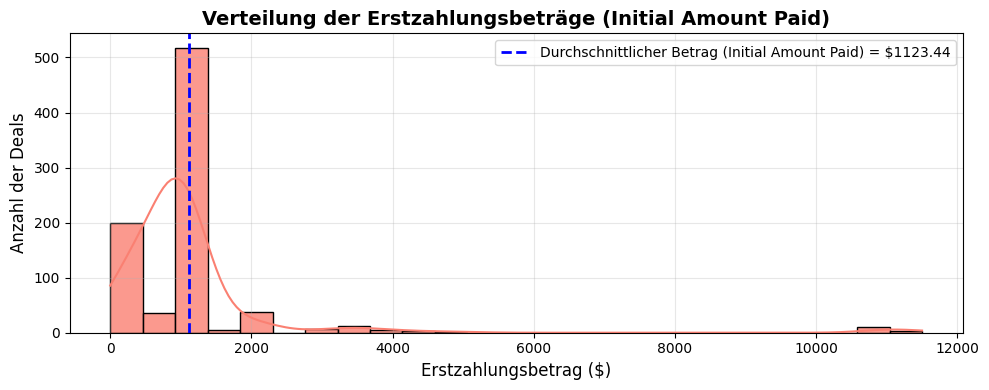

In [61]:
plt.figure(figsize=(10, 4))
sns.histplot(valid_payments, bins=25, kde=True, color='salmon', edgecolor='black', alpha=0.8)

plt.title('Verteilung der Erstzahlungsbeträge (Initial Amount Paid)', fontsize=14, fontweight='bold')
plt.xlabel('Erstzahlungsbetrag ($)', fontsize=12)
plt.ylabel('Anzahl der Deals', fontsize=12)
plt.grid(True, alpha=0.3)

# Füge vertikale Linie für den Durchschnitt hinzu
plt.axvline(AOV_payments, color='blue', linestyle='--', linewidth=2, label=f'Durchschnittlicher Betrag (Initial Amount Paid) = ${AOV_payments:.2f}')
plt.legend()

plt.tight_layout()
plt.show()

# **<a name='25'>25.  Analyse der Schadensursachen</a><br>**

In [62]:
# Filtere verlorene Deals (Stage = 'Lost')
# Analysiere die 5. Spalte — „Lost Reason“

lost_deals = deals_df[deals_df.iloc[:, 4] == 'Lost']

# Ermittle den häufigsten Verlustgrund (5. Spalte = Lost Reason)
#if len(lost_deals) > 0 and len(lost_deals.columns) > 5:
top_reason = lost_deals.iloc[:, 5].value_counts().idxmax()  # 5. Spalte = Lost Reason
print(f"Hauptgrund für Lead-Verlust: '{top_reason}'")

Hauptgrund für Lead-Verlust: 'Doesn't Answer'


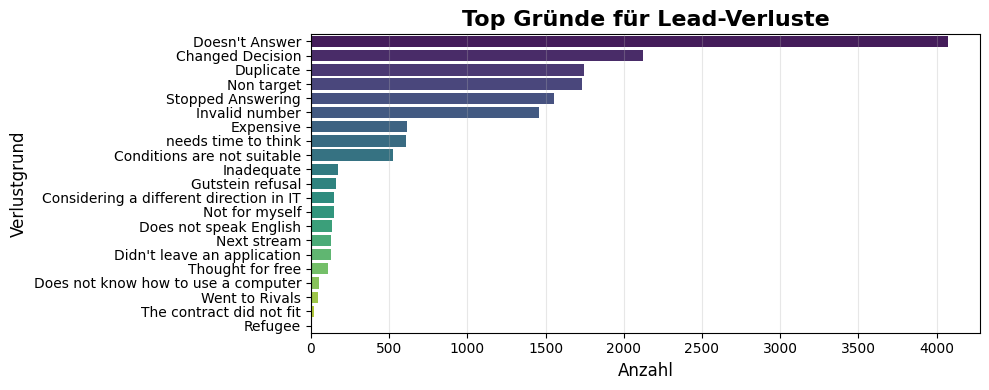

In [63]:
# Verteilung der Verlustgründe

plt.figure(figsize=(10, 4))
lost_reasons = lost_deals.iloc[:, 5].value_counts()

sns.barplot(x=lost_reasons.values, y=lost_reasons.index, hue=lost_reasons.index, palette='viridis', legend=False)

plt.title('Top Gründe für Lead-Verluste', fontsize=16, fontweight='bold')
plt.xlabel('Anzahl', fontsize=12)
plt.ylabel('Verlustgrund', fontsize=12)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

# **<a name='26'>26.  Formulieren eine Hypothese (HYPOTHESE FÜR WACHSTUM)</a><br>**

In [64]:
print(f"Wenn Manager innerhalb von 1 Stunde nach der Registrierung den Lead anrufen,")
print(f"steigt die Conversion Rate (C1) um 15 %, da die Gründe '{top_reason}' und 'Stopped Answering' reduziert werden.")


print(f"\n=== TEST ÜBER 2 WOCHEN ===")
print(f"1. Alle neuen Leads der letzten 14 Tage werden erfasst.")
print(f"2. Sie werden in 2 Gruppen geteilt: 50 % (alter Prozess) und 50 % (neu: Anruf innerhalb von 1 Stunde).")
print(f"3. Nach 14 Tagen wird die Conversion Rate (C1) in beiden Gruppen verglichen.")
print(f"4. Wenn die neue Gruppe eine um 15 % höhere C1 aufweist und das Ergebnis statistisch signifikant ist (p-Wert < 0,05), ist die Hypothese bestätigt.")

Wenn Manager innerhalb von 1 Stunde nach der Registrierung den Lead anrufen,
steigt die Conversion Rate (C1) um 15 %, da die Gründe 'Doesn't Answer' und 'Stopped Answering' reduziert werden.

=== TEST ÜBER 2 WOCHEN ===
1. Alle neuen Leads der letzten 14 Tage werden erfasst.
2. Sie werden in 2 Gruppen geteilt: 50 % (alter Prozess) und 50 % (neu: Anruf innerhalb von 1 Stunde).
3. Nach 14 Tagen wird die Conversion Rate (C1) in beiden Gruppen verglichen.
4. Wenn die neue Gruppe eine um 15 % höhere C1 aufweist und das Ergebnis statistisch signifikant ist (p-Wert < 0,05), ist die Hypothese bestätigt.


# **<a name='27'>27.  Metrischer Baum </a><br>**

In [65]:
print("""
Zielkennzahlen

Umsatz (Revenue)

Produktmetriken
├── UA (Users Acquired) — Traffic-Volumen
├── C1 (Conversion Rate) — Conversion zum Käufer → B = UA × C1
├── AOV (Average Order Value) — Durchschnittlicher Bestellwert
└── APC (Average Purchases per Customer) — Kaufhäufigkeit

Entscheidungs-Metriken
├── Sensitivitätsanalyse (DELTA ±10 %):
│   - +10 % UA → +10 % Revenue
│   - +10 % C1 → +10 % Revenue
│   - +10 % AOV → +10 % Revenue
│   - +10 % APC → +10 % Revenue
│   - +10 % CPA → wirkt nicht direkt, kann aber UA reduzieren → Revenue ↓
└── Produktvergleich:
    - Digital Marketing: Hoher Revenue dank hohem AOV und APC
    - Web Developer: Niedriger Revenue, aber stabil
    - UX/UI Design: Mittlerer Revenue, gute Balance

Atomare Metriken (Eingangsparameter)
├── UA — Anzahl
├── C1 — Prozent
├── AOV — $ pro Bestellung
└── APC — Transaktionen pro Kunde

Beobachtbare Metriken („Vanilla Metrics“)
├── Anzahl der Nutzer (UA)
├── Anzahl der Käufer (B = UA × C1)
├── Durchschnittlicher Bestellwert (AOV)
└── Kaufhäufigkeit (APC)
""")

print("Basierend auf der Datenanalyse ist der größte Hebel für Wachstum die Steigerung der Conversion Rate (C1) im Lead-Kommunikationsprozess.")
print("Die formulierte Hypothese zielt darauf ab, dieses Problem durch schnellere und häufigere Erstkontakte zu lösen.")
print("Zur Überprüfung der Hypothese wird empfohlen, den beschriebenen A/B-Test über einen Zeitraum von 2 Wochen durchzuführen.")


Zielkennzahlen

Umsatz (Revenue)

Produktmetriken
├── UA (Users Acquired) — Traffic-Volumen
├── C1 (Conversion Rate) — Conversion zum Käufer → B = UA × C1
├── AOV (Average Order Value) — Durchschnittlicher Bestellwert
└── APC (Average Purchases per Customer) — Kaufhäufigkeit

Entscheidungs-Metriken
├── Sensitivitätsanalyse (DELTA ±10 %):
│   - +10 % UA → +10 % Revenue
│   - +10 % C1 → +10 % Revenue
│   - +10 % AOV → +10 % Revenue
│   - +10 % APC → +10 % Revenue
│   - +10 % CPA → wirkt nicht direkt, kann aber UA reduzieren → Revenue ↓
└── Produktvergleich:
    - Digital Marketing: Hoher Revenue dank hohem AOV und APC
    - Web Developer: Niedriger Revenue, aber stabil
    - UX/UI Design: Mittlerer Revenue, gute Balance

Atomare Metriken (Eingangsparameter)
├── UA — Anzahl
├── C1 — Prozent
├── AOV — $ pro Bestellung
└── APC — Transaktionen pro Kunde

Beobachtbare Metriken („Vanilla Metrics“)
├── Anzahl der Nutzer (UA)
├── Anzahl der Käufer (B = UA × C1)
├── Durchschnittlicher Bestellwer

# **<a name='28'>28.  SCHLUSSFOLGERUNG </a><br>**

In [66]:
print("Der wichtigste Wachstumsfaktor liegt laut Datenanalyse in der Steigerung der Conversion (C1) in der Lead-Kommunikationsphase.")
print("Die formulierte Hypothese zielt darauf ab, dieses Problem durch eine Beschleunigung und Erhöhung der Erstkontaktfrequenz zu lösen.")
print("Zur Überprüfung der Hypothese wird empfohlen, den beschriebenen A/B-Test über einen Zeitraum von zwei Wochen durchzuführen.")

Der wichtigste Wachstumsfaktor liegt laut Datenanalyse in der Steigerung der Conversion (C1) in der Lead-Kommunikationsphase.
Die formulierte Hypothese zielt darauf ab, dieses Problem durch eine Beschleunigung und Erhöhung der Erstkontaktfrequenz zu lösen.
Zur Überprüfung der Hypothese wird empfohlen, den beschriebenen A/B-Test über einen Zeitraum von zwei Wochen durchzuführen.
